In [370]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft #stft
from scipy.signal import butter, sosfiltfilt #signal filtering 
from scipy.interpolate import interp1d
import numpy as npy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [371]:
#first test example from "MuseCrocMobile" Paper
#file_path = "MuseCrocMobile_Analysis/2025-08-16_15_12_26_Muse_Recording.csv"

#while programming - moving around at desk 
#file_path = "MuseCrocMobile_2025-10-08_21_57_05_MS_03PRESET_1032_EEG@256Hz_Accelerometer@52Hz_Gyroscope@52Hz_DRL_REF@32Hz_Optics@64Hz_.csv"

#eyes open, staring at monitor 
file_path = "MuseCrocMobile_2025-10-08_21_12_24_MS_03PRESET_1032_EEG@256Hz_Accelerometer@52Hz_Gyroscope@52Hz_DRL_REF@32Hz_Optics@64Hz_.csv"

#change to your file path
df = pd.read_csv(file_path)
df.head()

for col_name in df.columns:
    print(col_name)

print(df.shape)

#Setting font size to 25 for all graphs
plt.rcParams.update({'font.size': 25})

PACKET_TYPE
CLOCK_TIME
ms_ELAPSED
TP9_CONNECTION_STRENGTH(HSI)
TP9_ARTIFACT_FREE(IS_GOOD)
AF7_CONNECTION_STRENGTH(HSI)
AF7_ARTIFACT_FREE(IS_GOOD)
AF8_CONNECTION_STRENGTH(HSI)
AF8_ARTIFACT_FREE(IS_GOOD)
TP10_CONNECTION_STRENGTH(HSI)
TP10_ARTIFACT_FREE(IS_GOOD)
TP9_RAW
AF7_RAW
AF8_RAW
TP10_RAW
DRL
REF
TP9_DELTA_ABSOLUTE
AF7_DELTA_ABSOLUTE
AF8_DELTA_ABSOLUTE
TP10_DELTA_ABSOLUTE
TP9_THETA_ABSOLUTE
AF7_THETA_ABSOLUTE
AF8_THETA_ABSOLUTE
TP10_THETA_ABSOLUTE
TP9_ALPHA_ABSOLUTE
AF7_ALPHA_ABSOLUTE
AF8_ALPHA_ABSOLUTE
TP10_ALPHA_ABSOLUTE
TP9_BETA_ABSOLUTE
AF7_BETA_ABSOLUTE
AF8_BETA_ABSOLUTE
TP10_BETA_ABSOLUTE
TP9_GAMMA_ABSOLUTE
AF7_GAMMA_ABSOLUTE
AF8_GAMMA_ABSOLUTE
TP10_GAMMA_ABSOLUTE
TP9_DELTA_RELATIVE
AF7_DELTA_RELATIVE
AF8_DELTA_RELATIVE
TP10_DELTA_RELATIVE
TP9_THETA_RELATIVE
AF7_THETA_RELATIVE
AF8_THETA_RELATIVE
TP10_THETA_RELATIVE
TP9_ALPHA_RELATIVE
AF7_ALPHA_RELATIVE
AF8_ALPHA_RELATIVE
TP10_ALPHA_RELATIVE
TP9_BETA_RELATIVE
AF7_BETA_RELATIVE
AF8_BETA_RELATIVE
TP10_BETA_RELATIVE
TP9_GAMMA_RELA

/tmp/ipykernel_21339/3952283556.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


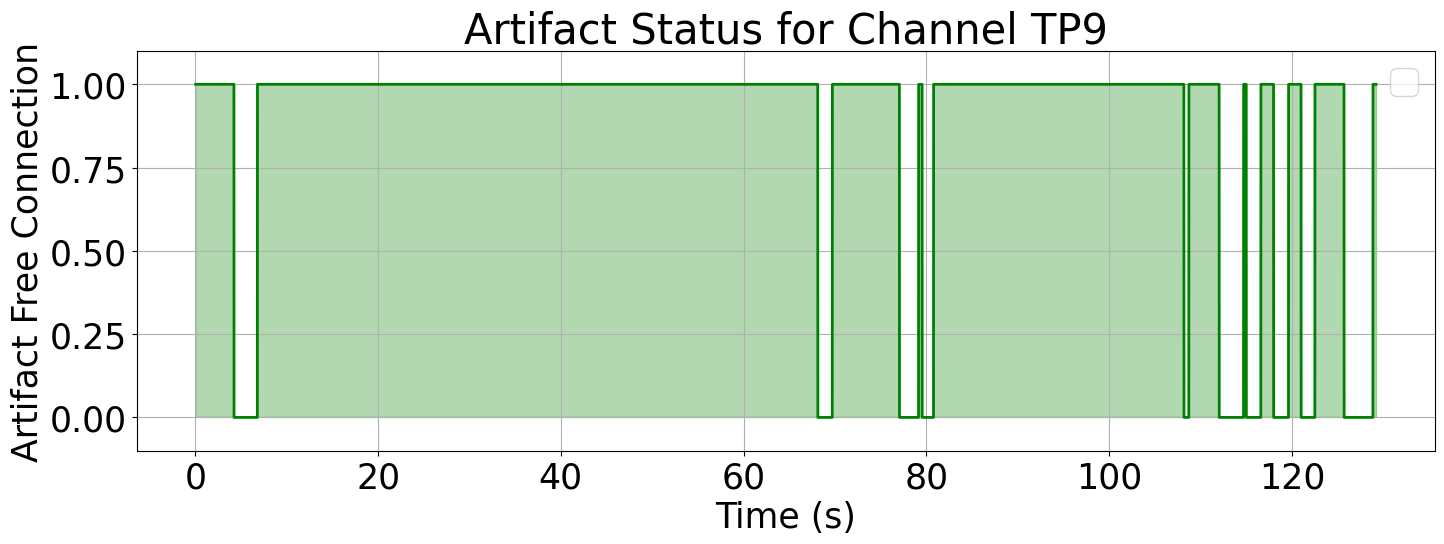

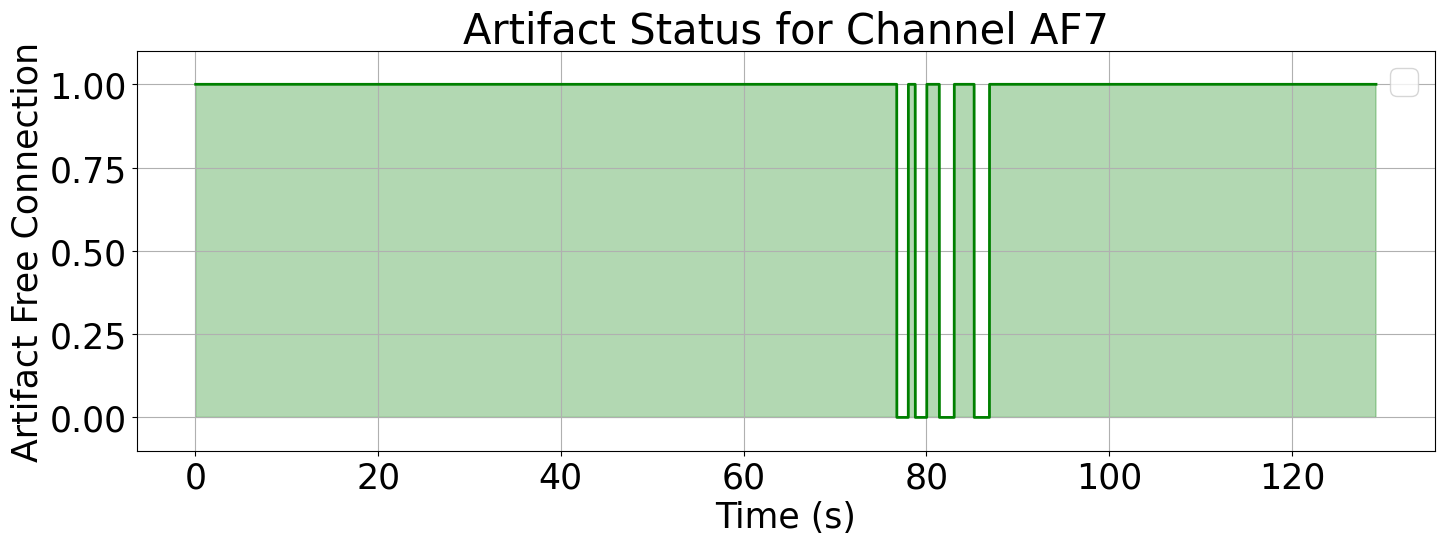

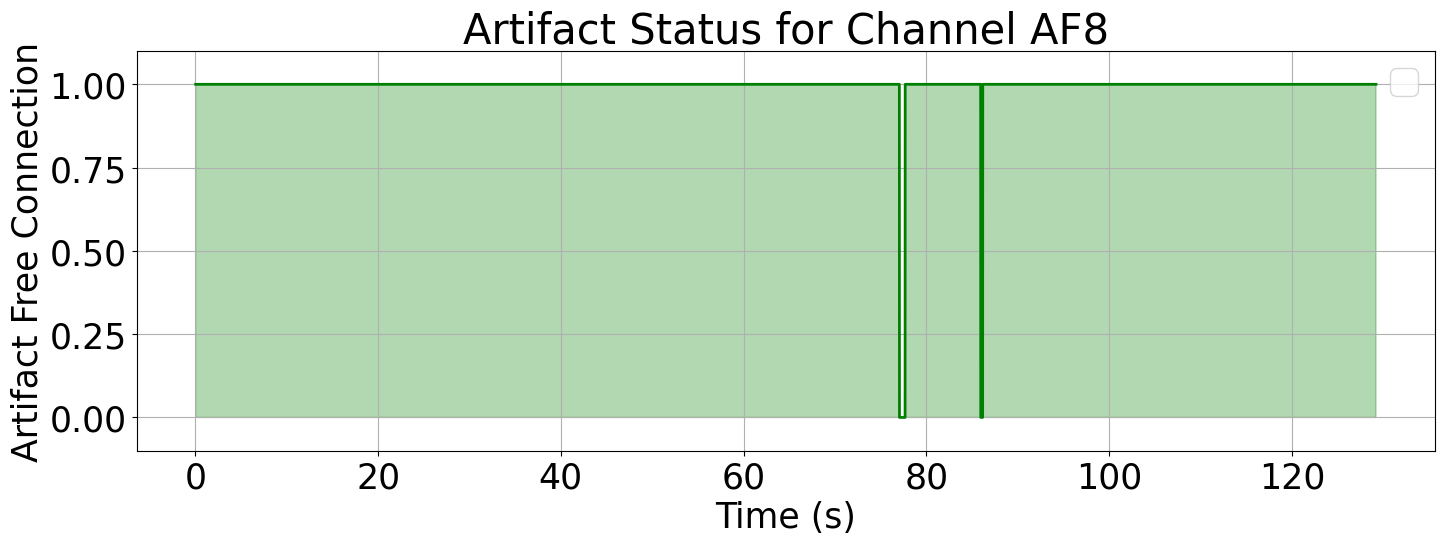

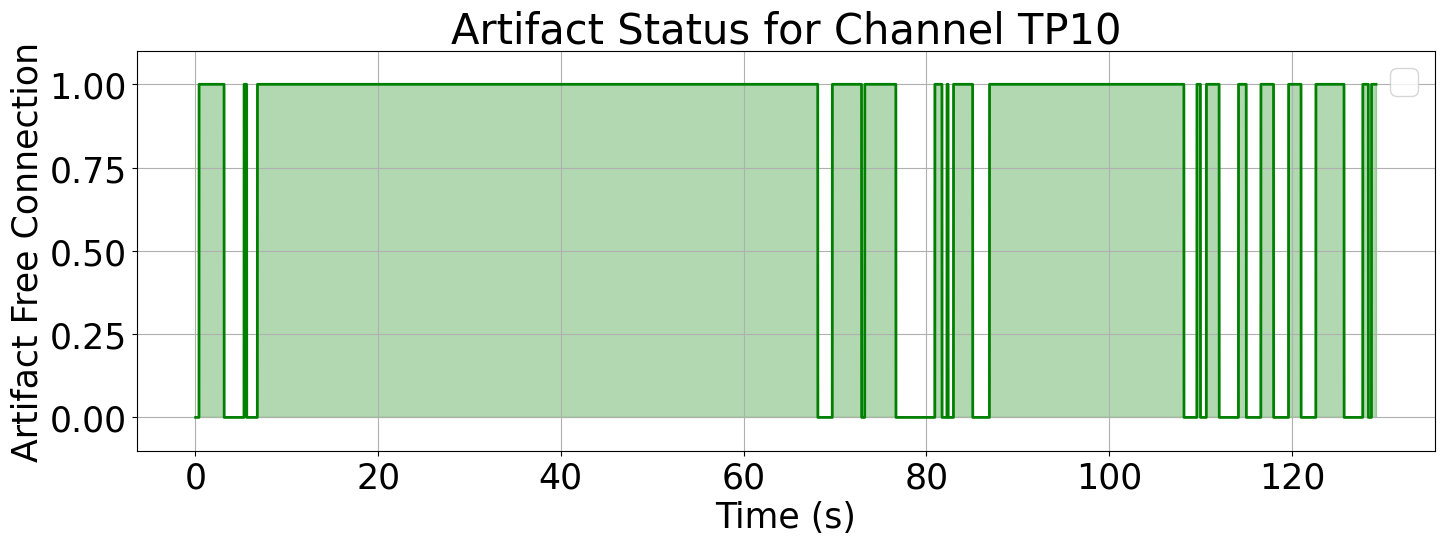

In [372]:
#Artifact Detection Code

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]

for ch in channels:
    artifact_col = ch + "_ARTIFACT_FREE(IS_GOOD)"

    plt.figure(figsize=(15, 6))

    plt.plot(time_sec, df[artifact_col], linewidth=2, color='green')
    plt.fill_between(time_sec, 0, df[artifact_col], where=(df[artifact_col] >0), color='green', alpha=0.3)

    plt.xlabel("Time (s)")
    plt.ylabel("Artifact Free Connection")
    plt.title(f"Artifact Status for Channel {ch}")

    plt.grid(True)
    plt.legend()
    plt.ylim(-0.1, 1.1)
    #plt.xlim(0,30)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_21339/1559566416.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


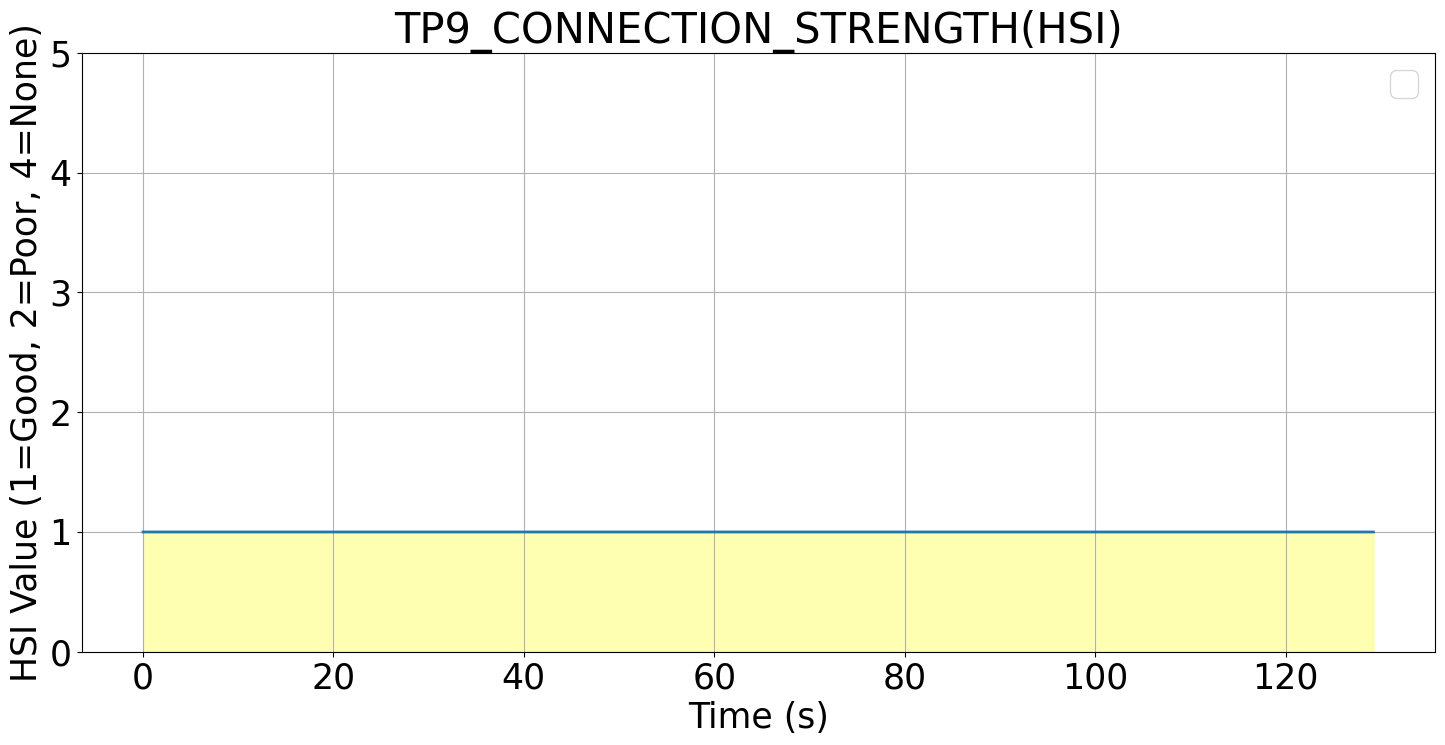

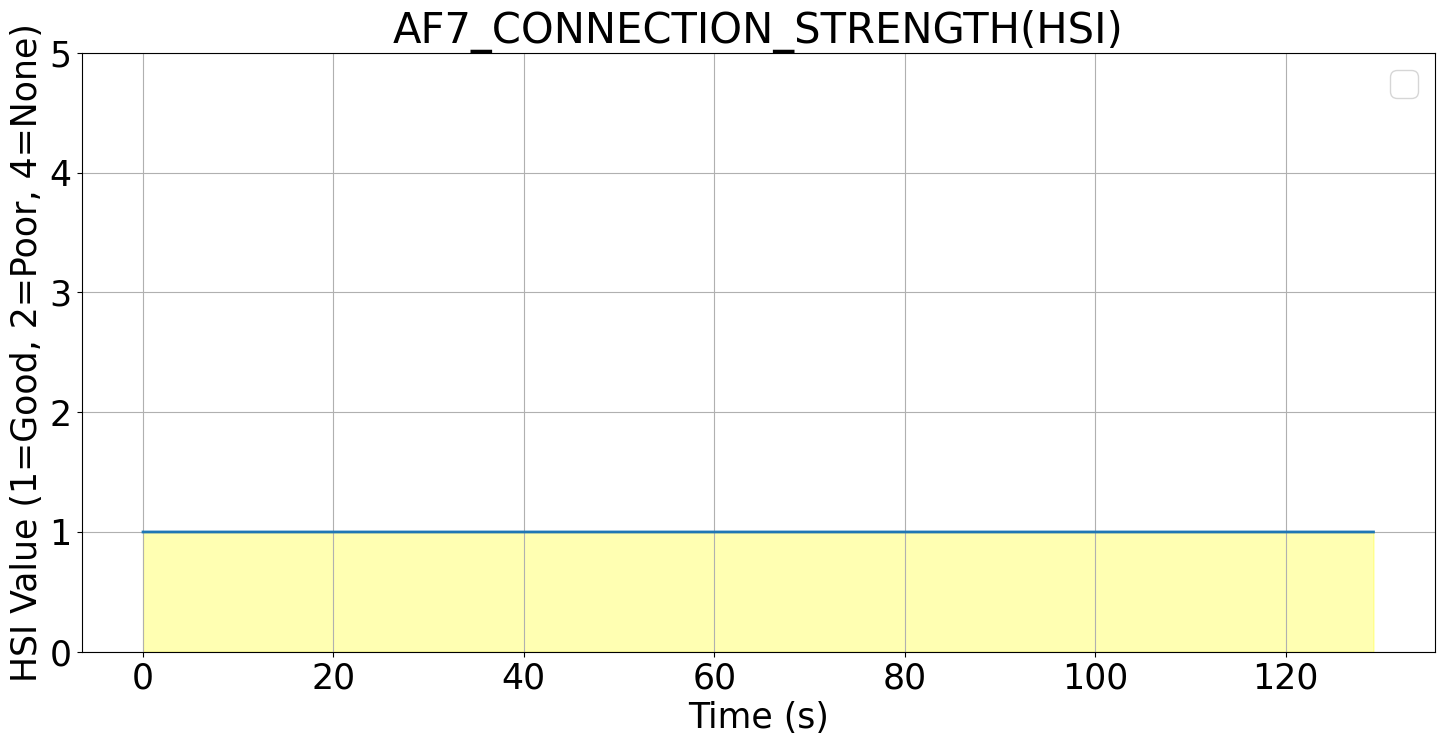

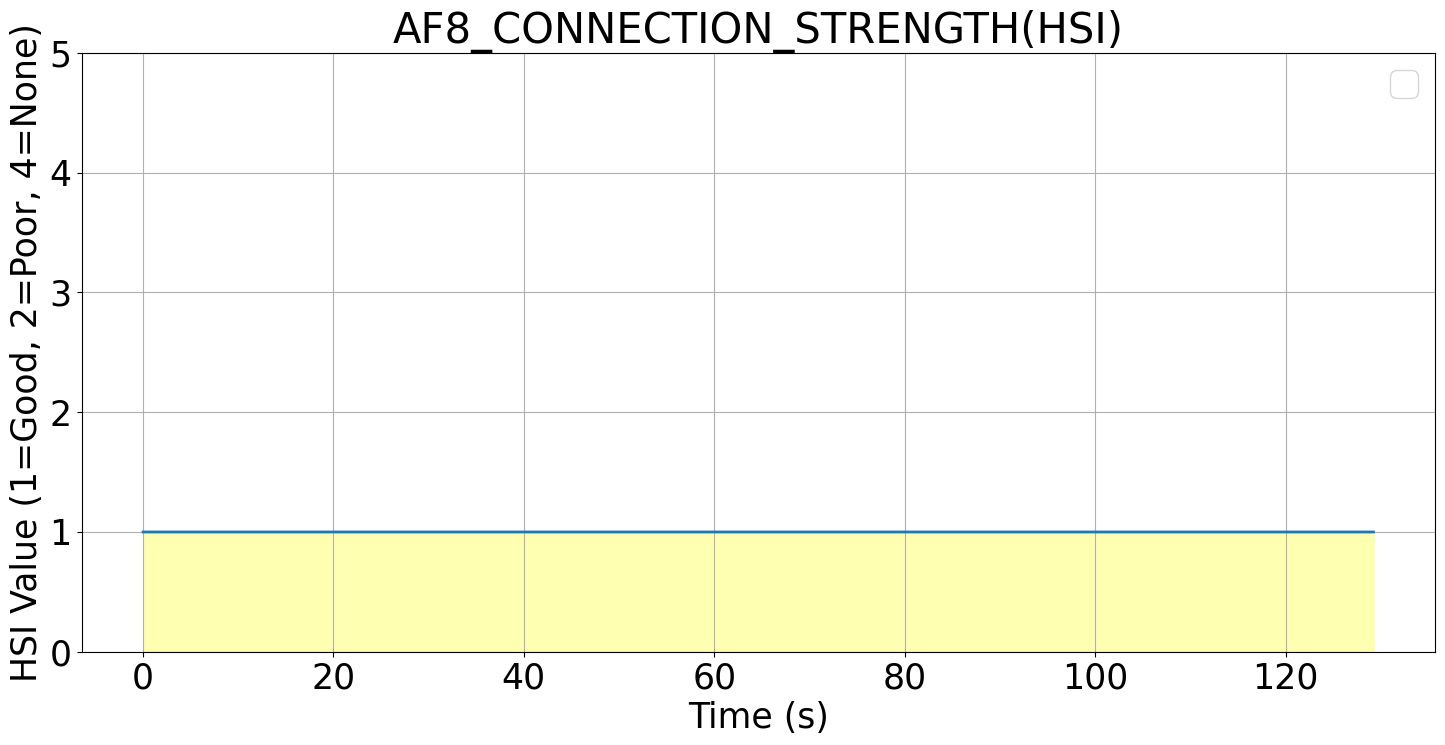

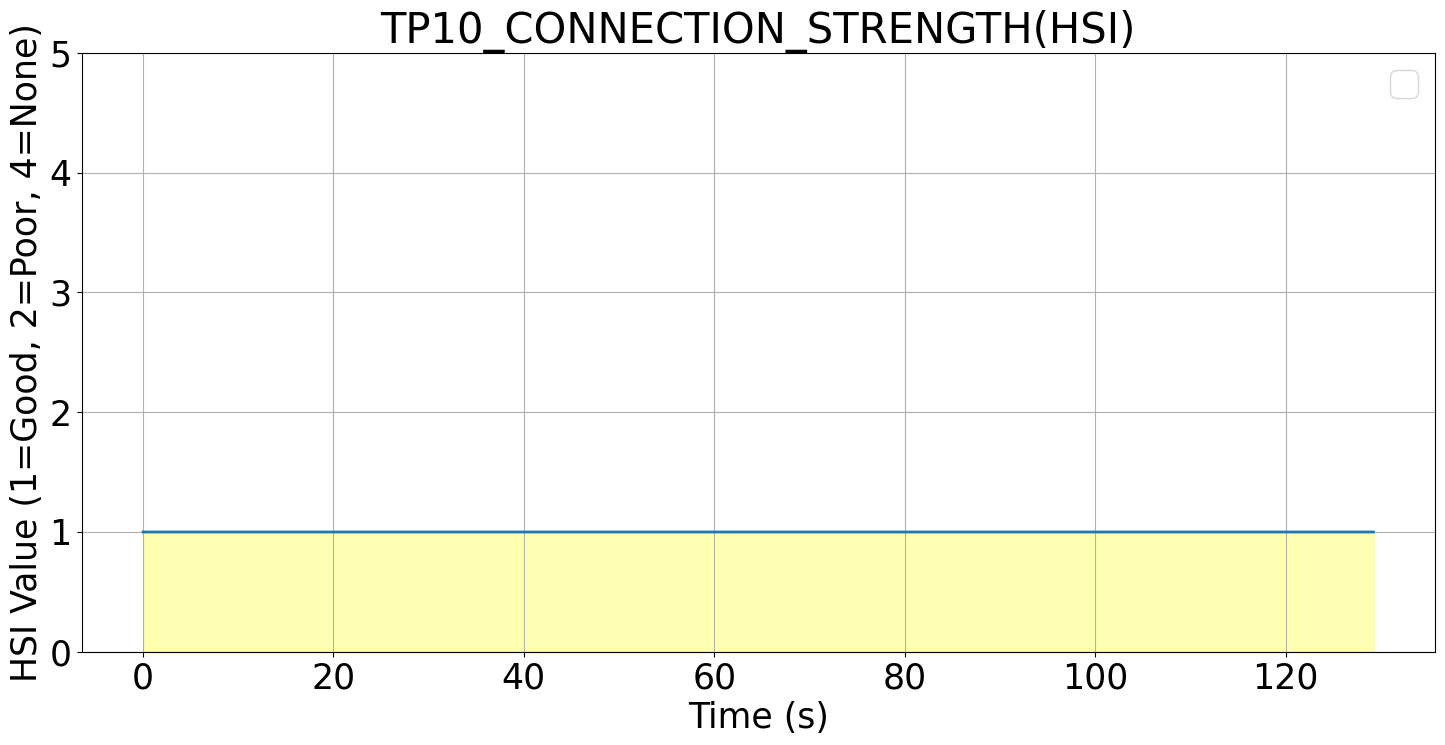

In [373]:
time_sec = df["ms_ELAPSED"] / 1000.0
hsi_channels = ["TP9_CONNECTION_STRENGTH(HSI)","AF7_CONNECTION_STRENGTH(HSI)","AF8_CONNECTION_STRENGTH(HSI)","TP10_CONNECTION_STRENGTH(HSI)"]

for hsi_ch in hsi_channels:

    plt.figure(figsize=(15, 8))

    #plottign the channel's values
    #plt.plot(time_sec, df[hsi_ch],label=hsi_ch, linewidth=2)
    plt.plot(time_sec, df[hsi_ch], linewidth=2)

    plt.xlabel("Time (s)")
    plt.ylabel("HSI Value (1=Good, 2=Poor, 4=None)")
    plt.title(hsi_ch)

    plt.fill_between(time_sec, 0, df[hsi_ch], where=(df[hsi_ch] >0), color='yellow', alpha=0.3)

    plt.ylim(0, 5) #setting graph to display values between 0-5

    #Labeling the different HSI values 
    #plt.yticks([1, 2, 4], ['Good Connection','Poor Connection', 'No/Horrible Connection'])

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

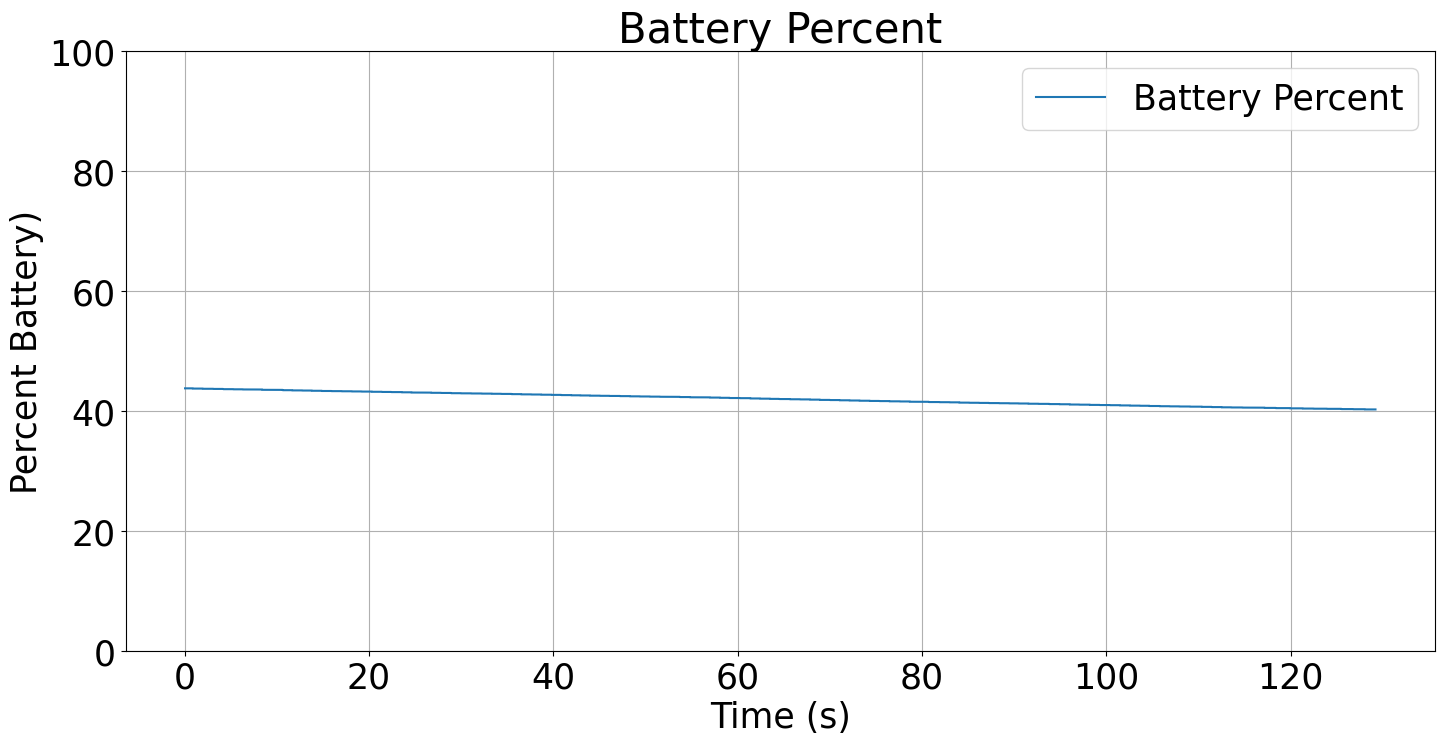

In [374]:
'''
Battery issues can cause the Muse to malfunction - check that!
'''

time_sec = df["ms_ELAPSED"] / 1000.0

plt.figure(figsize=(15, 8))
plt.plot(time_sec, df['BATTERY_PERCENT'], label="Battery Percent")

plt.ylim(0,100)

plt.xlabel("Time (s)")
plt.ylabel("Percent Battery)")
plt.title(f"Battery Percent")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

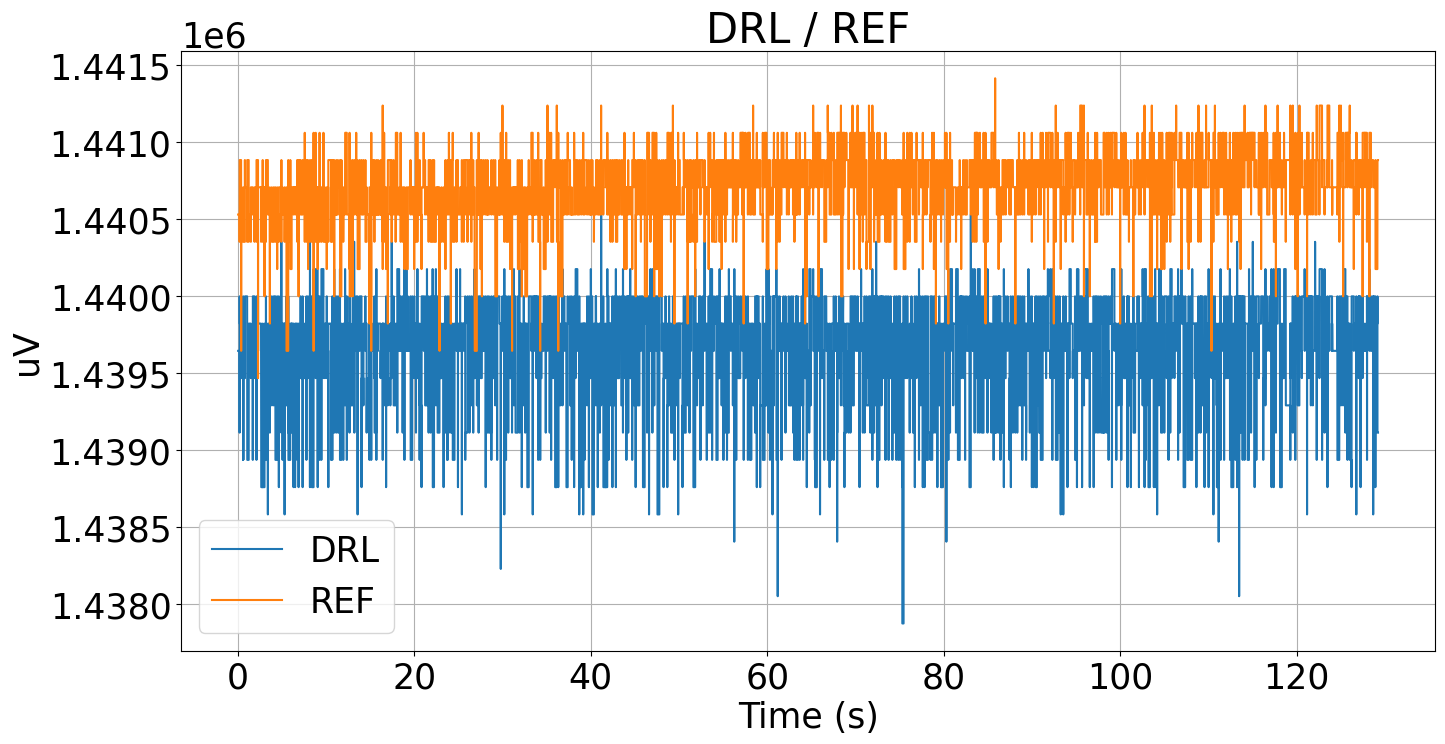

In [375]:
''' 
Graphing the DRL (Driven Right Leg, electrode at FPz ) and REF (Reference, at FP1 and FP2)
'''

plt.figure(figsize=(15, 8))
plt.plot(time_sec, df['DRL'], label="DRL")
plt.plot(time_sec, df['REF'], label="REF")

plt.xlabel("Time (s)")
plt.ylabel("uV")
plt.title(f"DRL / REF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

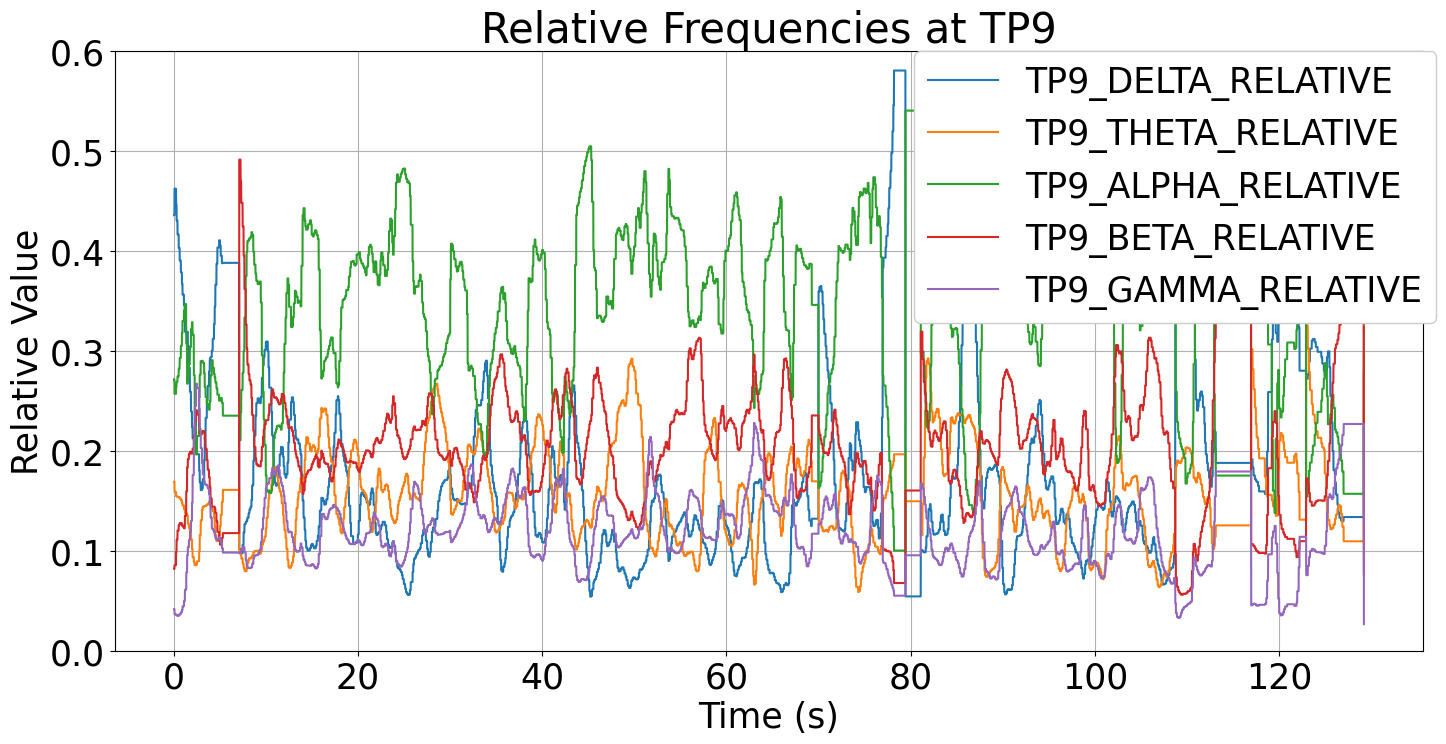

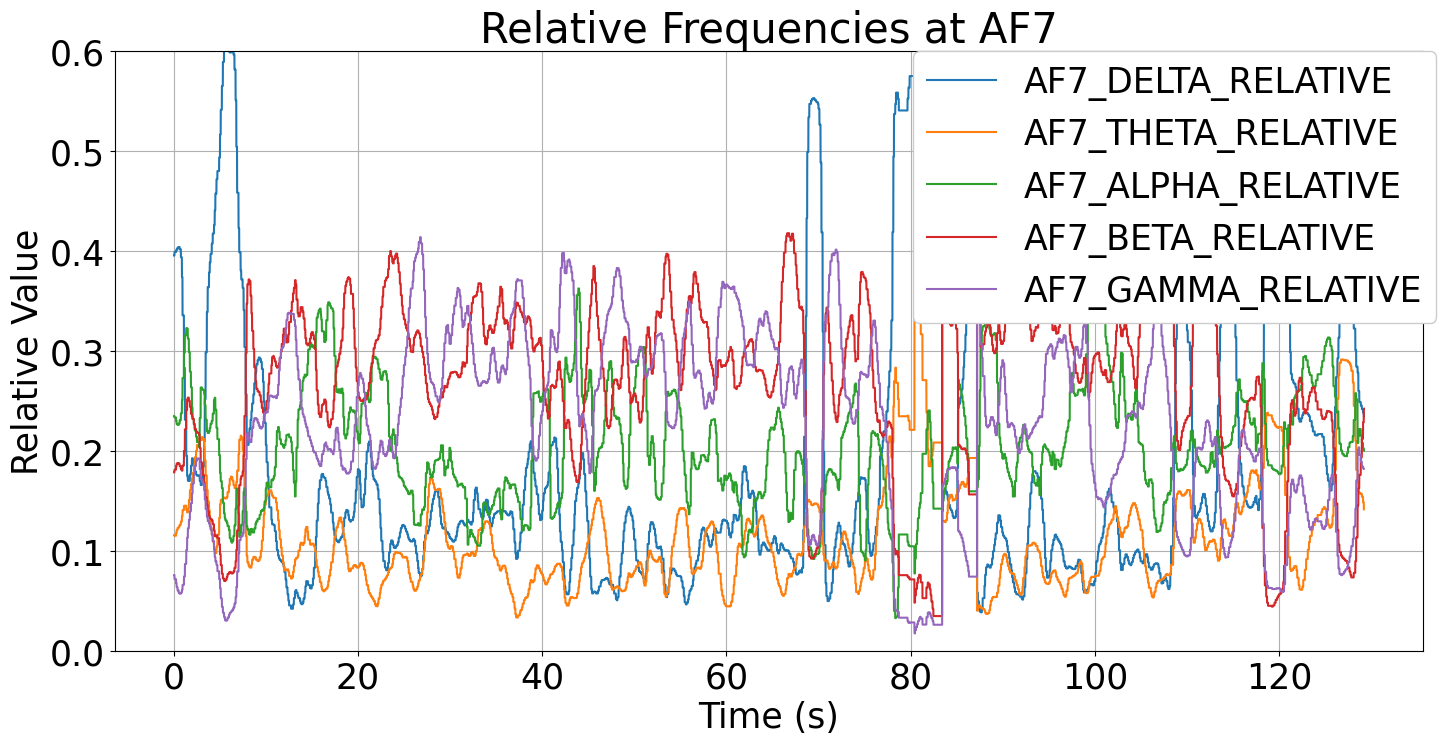

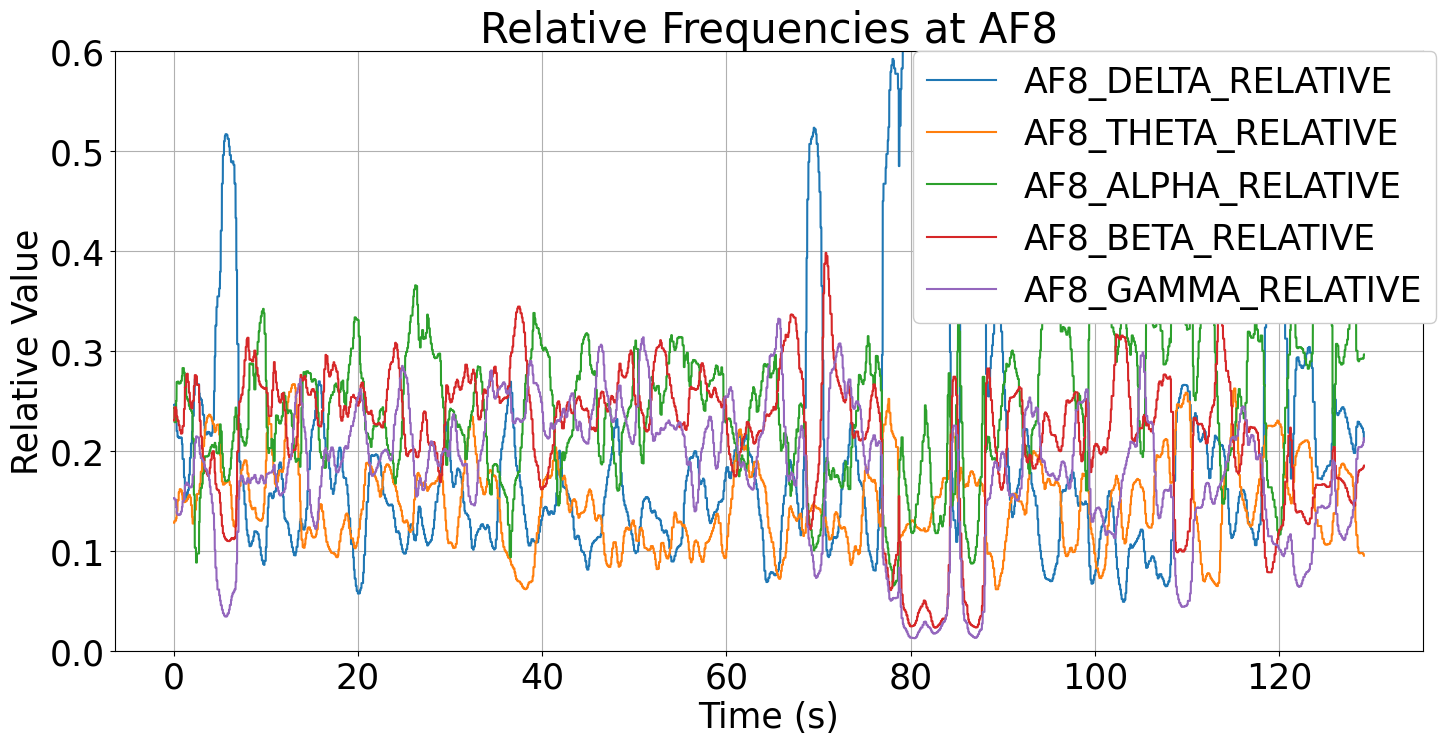

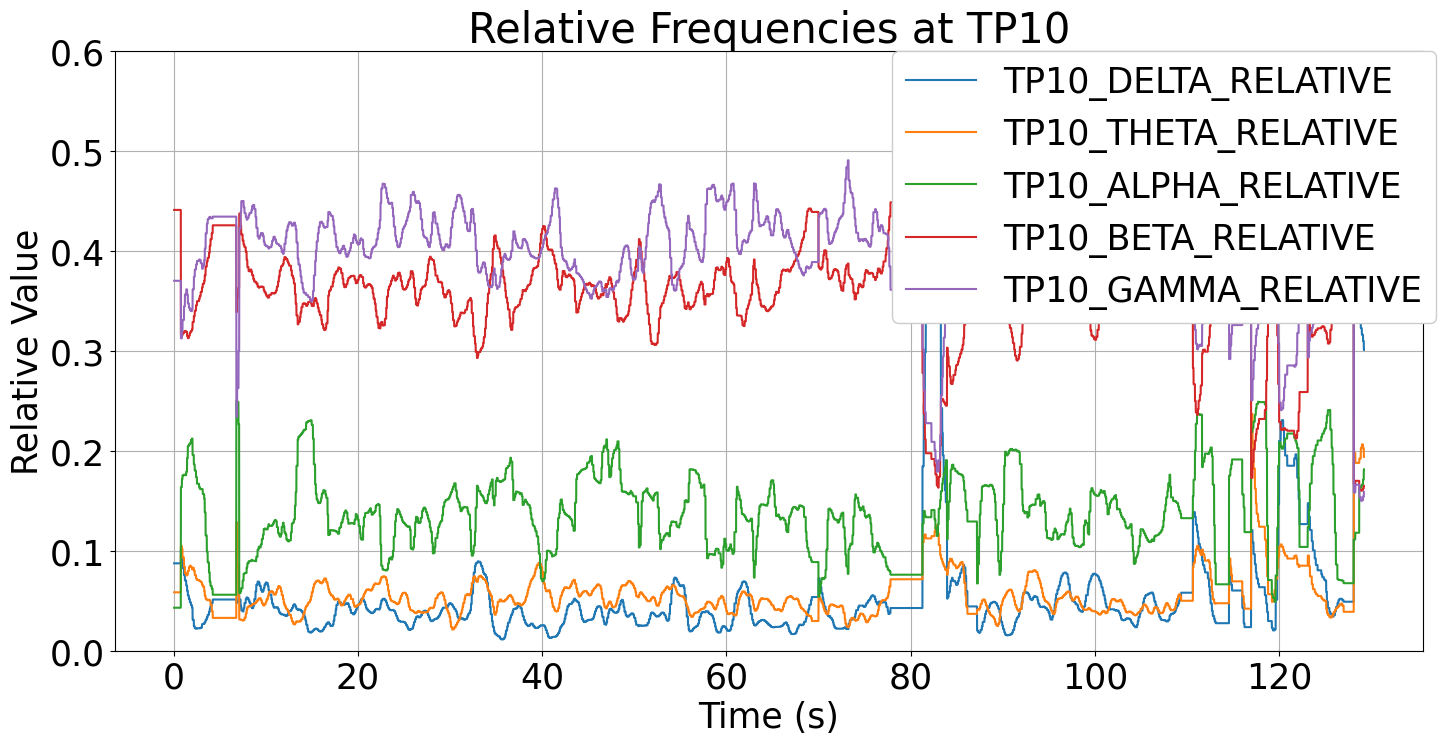

In [376]:
#This code graphs relative freqs over time

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]
waves = ["_DELTA", "_THETA", "_ALPHA", "_BETA", "_GAMMA"]

for ch in channels:

    plt.figure(figsize=(15, 8))

    for w in waves:
        
        d = ch + w + "_RELATIVE"
        
        plt.plot(time_sec, df[d], label=d)
        #plt.plot(time_sec, df[d])
    
    plt.xlabel("Time (s)")
    plt.ylabel("Relative Value")

    plt.title(f"Relative Frequencies at " + ch)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.01,1) , loc='upper right', borderaxespad=0. , framealpha=1)
    #plt.xlim(0,30) 
    plt.ylim(0, 0.6)
    plt.tight_layout()
    plt.show()


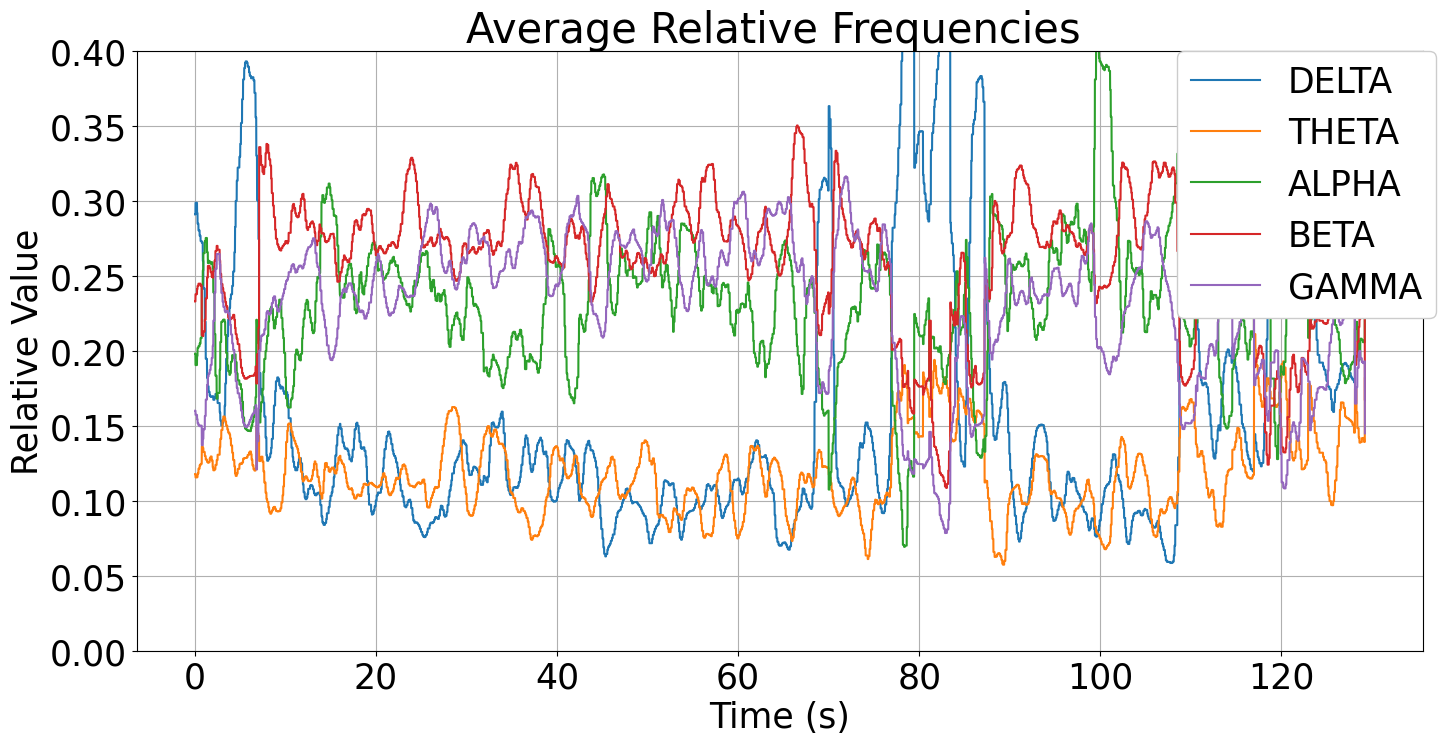

In [377]:
#Avg Relative Frequencies

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]
waves = ["DELTA", "THETA", "ALPHA", "BETA", "GAMMA"]

plt.figure(figsize=(15, 8))

plt.xlabel("Time (s)")
plt.ylabel("Relative Value")
plt.title("Average Relative Frequencies ")

for w in waves:
    #collecting channel values for a wave
    waveChannels = []
    for ch in channels:
        waveChannels.append( ch + "_" + w + "_RELATIVE" )

    #take mean values of each waveChannel 
    wave_mean = df[waveChannels].mean(axis=1).values
    
    plt.plot(time_sec, wave_mean, label=(w))
    #plt.plot(time_sec, wave_mean)
        
plt.grid(True)
plt.legend(bbox_to_anchor=(1.01,1) , loc='upper right', borderaxespad=0. , framealpha=1)
#plt.xlim(0,30)
plt.ylim(0, 0.4)
plt.tight_layout()
plt.show()

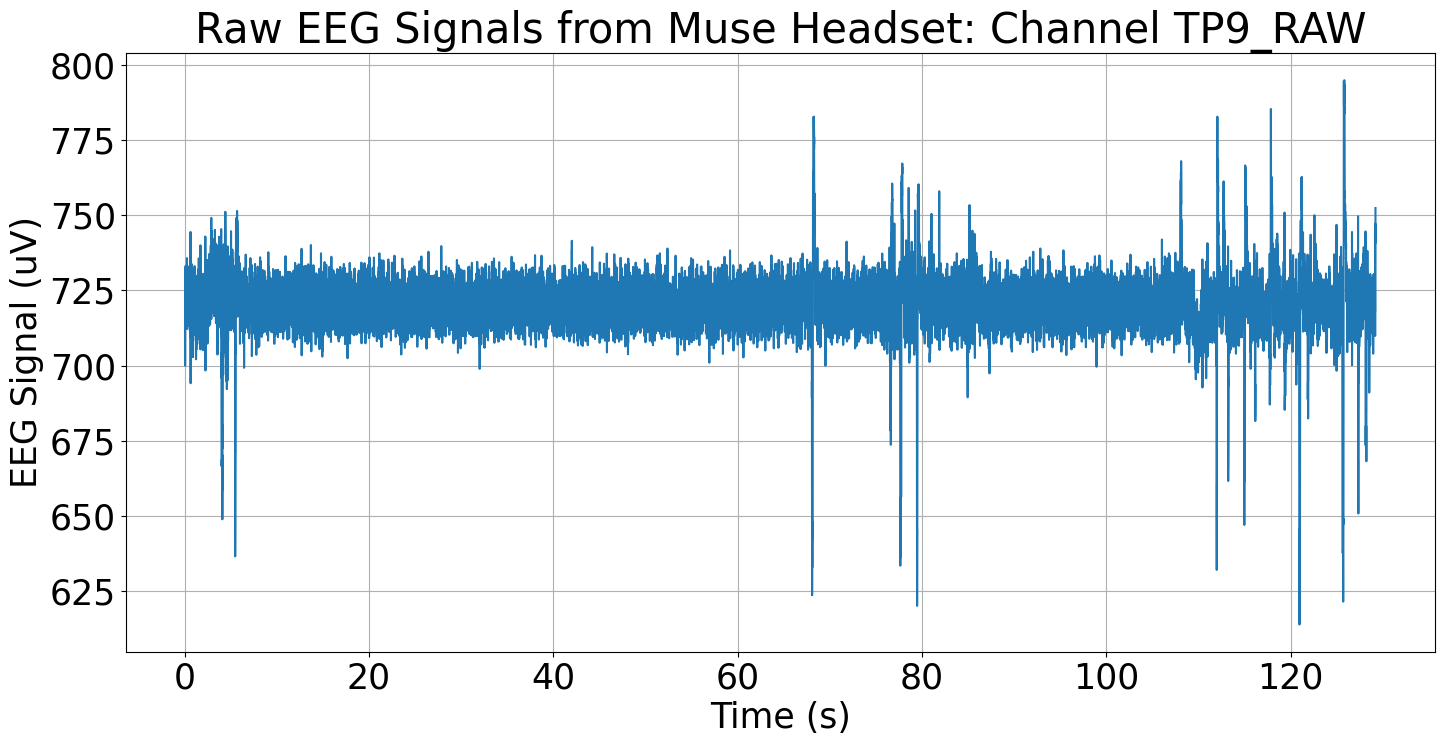

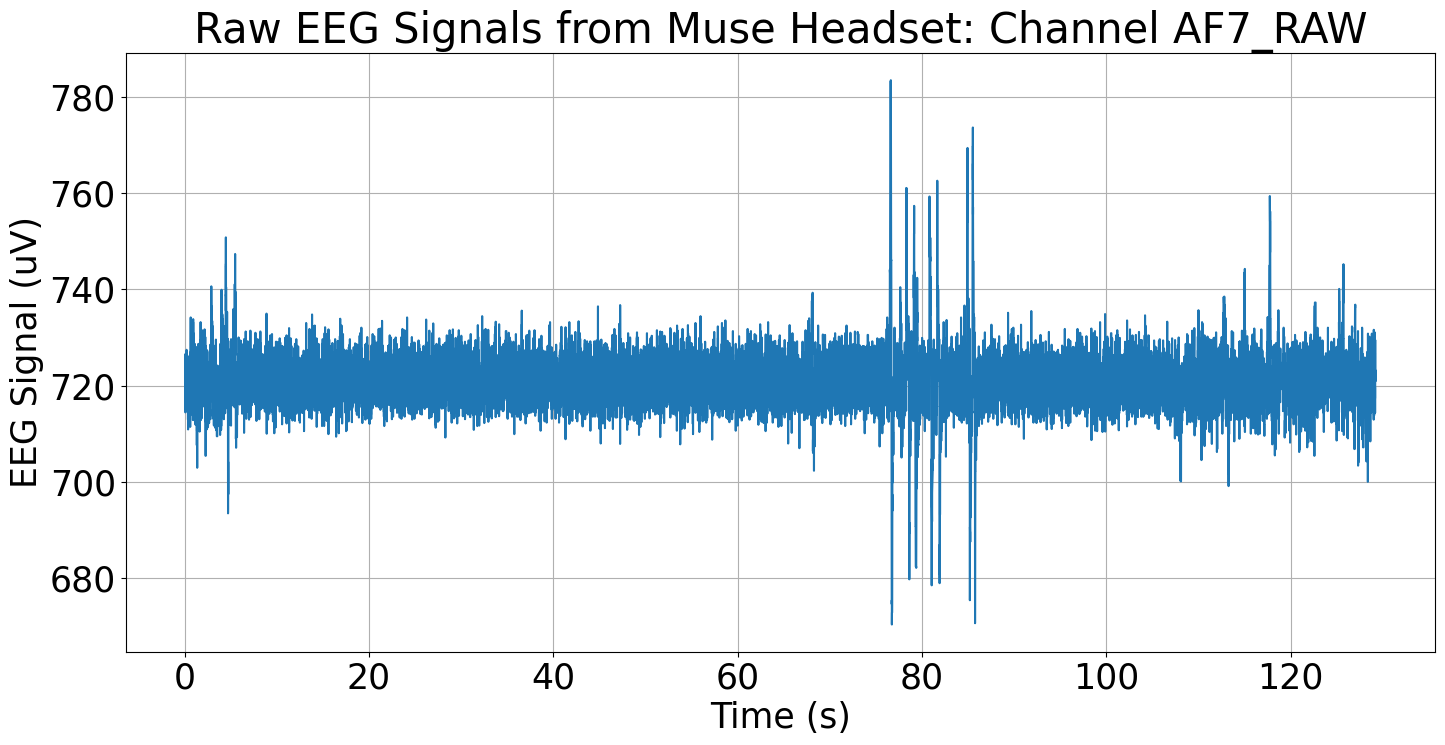

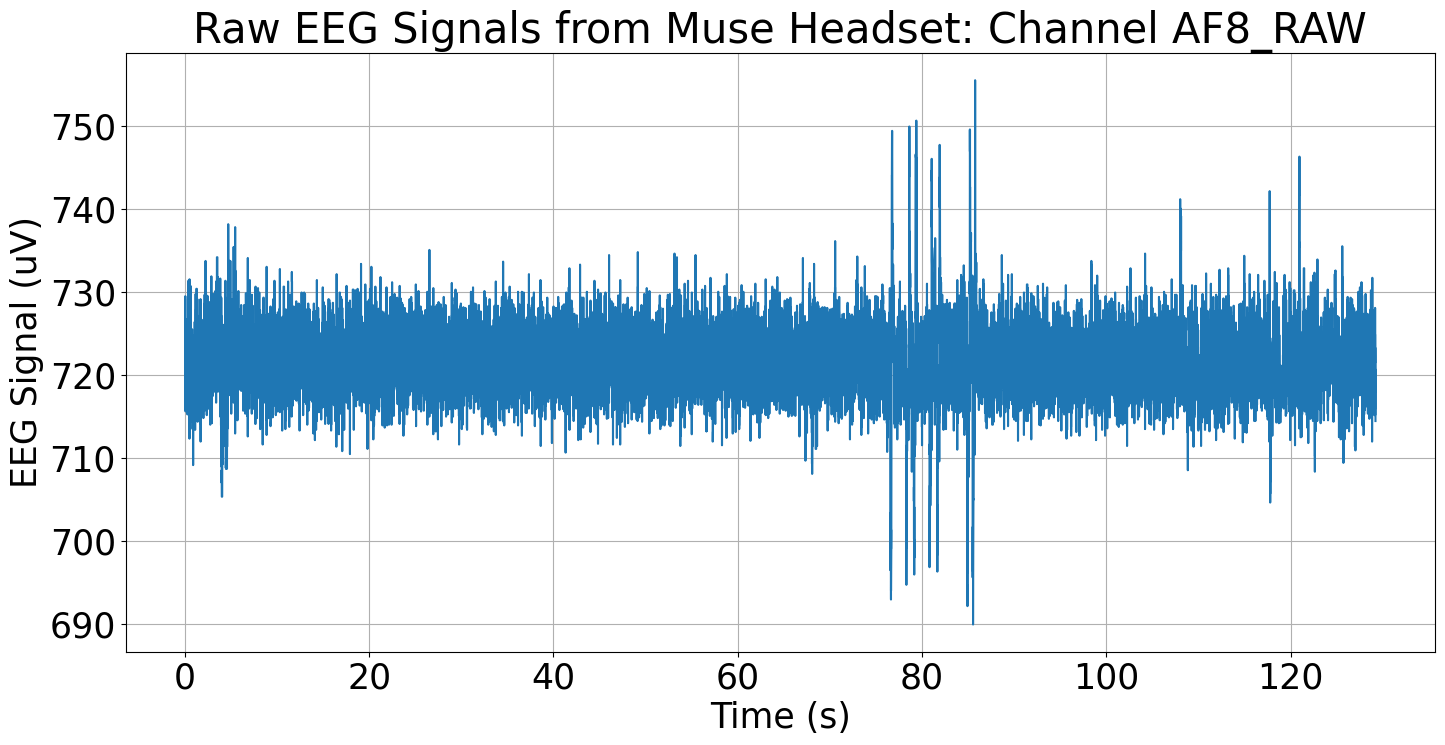

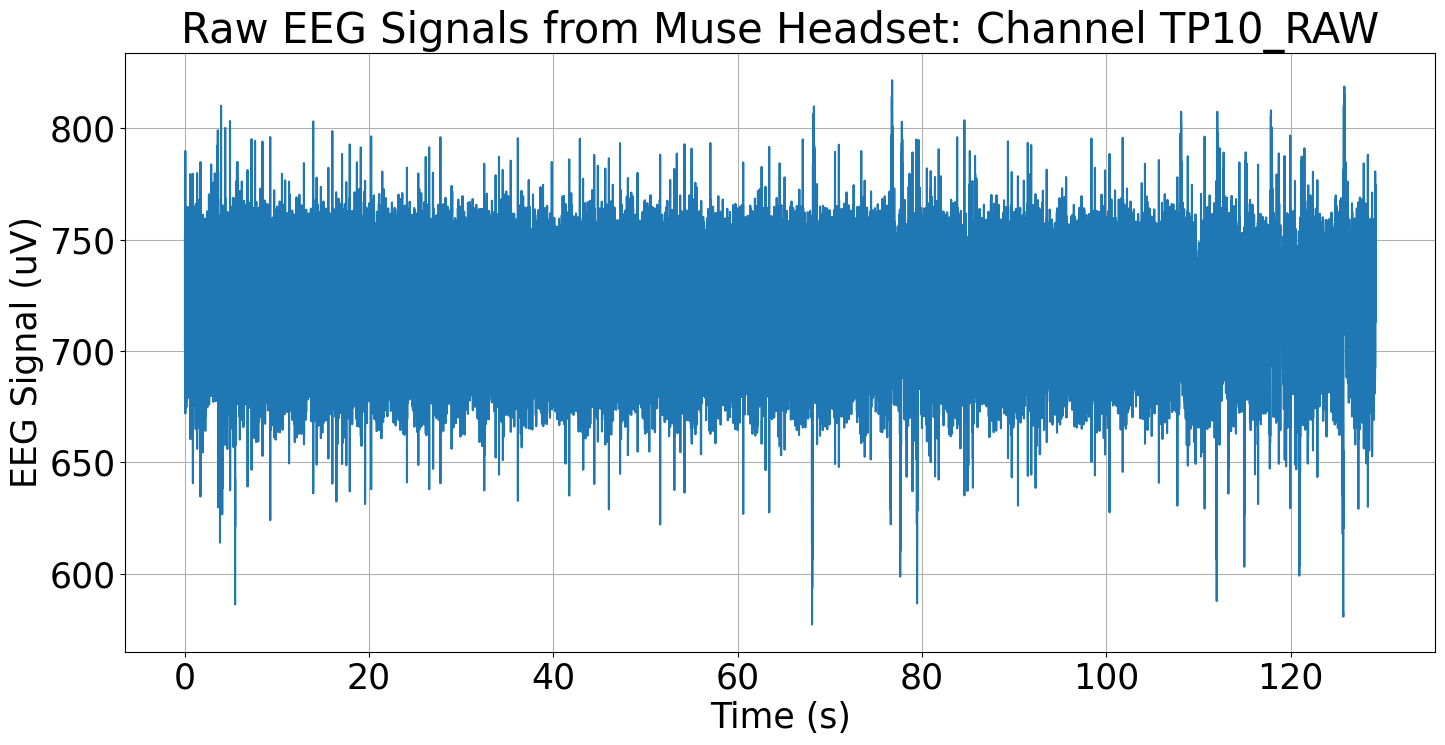

In [378]:
time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9_RAW", "AF7_RAW", "AF8_RAW", "TP10_RAW"]
fs = 256
window = 2

for ch in channels:

    plt.figure(figsize=(15, 8))
    #plt.plot(time_sec, df[ch], label=ch)
    plt.plot(time_sec, df[ch])

    #plt.ylim(500,900)
    #plt.xlim(0,30)

    plt.xlabel("Time (s)")
    plt.ylabel("EEG Signal (uV)")
    plt.title(f"Raw EEG Signals from Muse Headset: Channel {ch}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [379]:
'''
Using a 0.1-30Hz Butterworth bandpass filter. 

Standard in neuroscience research: 
https://neuraldatascience.io/7-eeg/erp_filtering.html 
'''

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9_RAW", "AF7_RAW", "AF8_RAW", "TP10_RAW"]

filtered_data = pd.DataFrame(columns = channels)

for ch in channels:

    # Define filter parameters
    lowcut = 0.1  # High-pass cutoff frequency
    highcut = 30   # Low-pass cutoff frequency
    sfreq = 500    #sampling freq
    order = 4      # Filter order

    # Calculate Nyquist frequency - for us sfreq/3
    nyquist_freq = sfreq/3

    # Normalize cutoff frequencies
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq

    # Design the Butterworth band-pass filter
    sos = butter(order, [low, high], btype='bandpass', output='sos')

    # Apply the filter using sosfiltfilt for zero-phase filtering
    filtered_data[ch] = sosfiltfilt(sos, df[ch])

Number of samples: 66615
Channel: TP9_RAW
Number of samples - time_sec: 66615, filtered_data: 66615
filtered_data range: -102.99124932615538 to 69.62999282427279


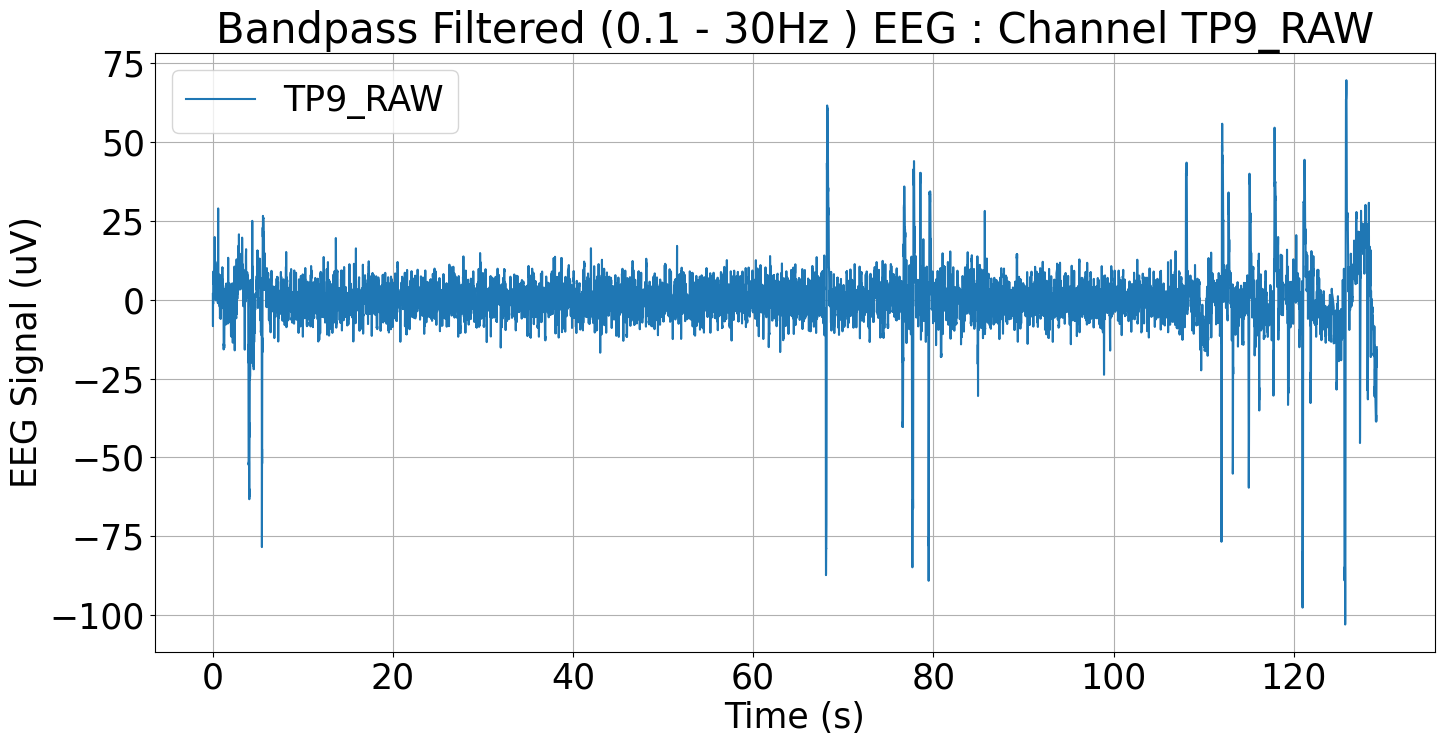

Number of samples: 66615
Channel: AF7_RAW
Number of samples - time_sec: 66615, filtered_data: 66615
filtered_data range: -49.84873019036482 to 62.665706118727385


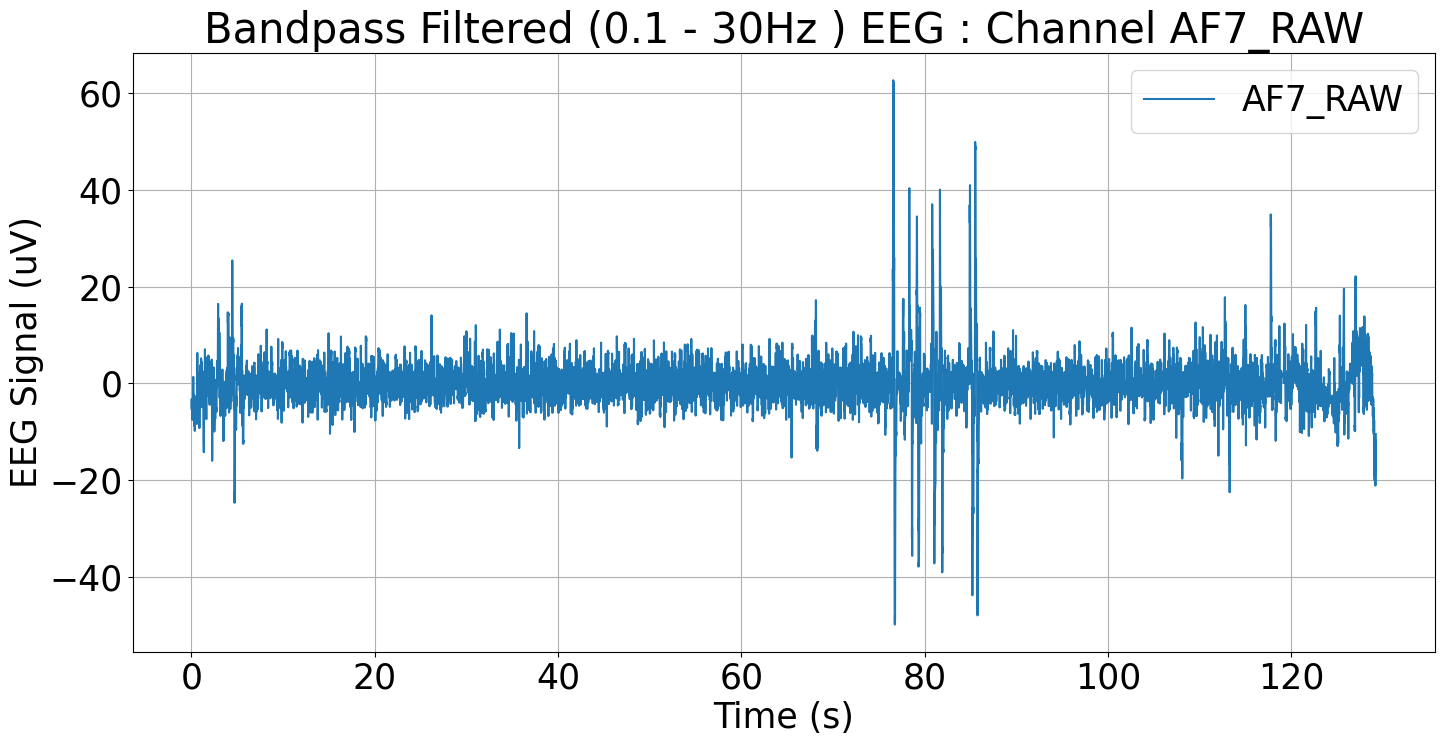

Number of samples: 66615
Channel: AF8_RAW
Number of samples - time_sec: 66615, filtered_data: 66615
filtered_data range: -27.76638457130567 to 31.096412303923984


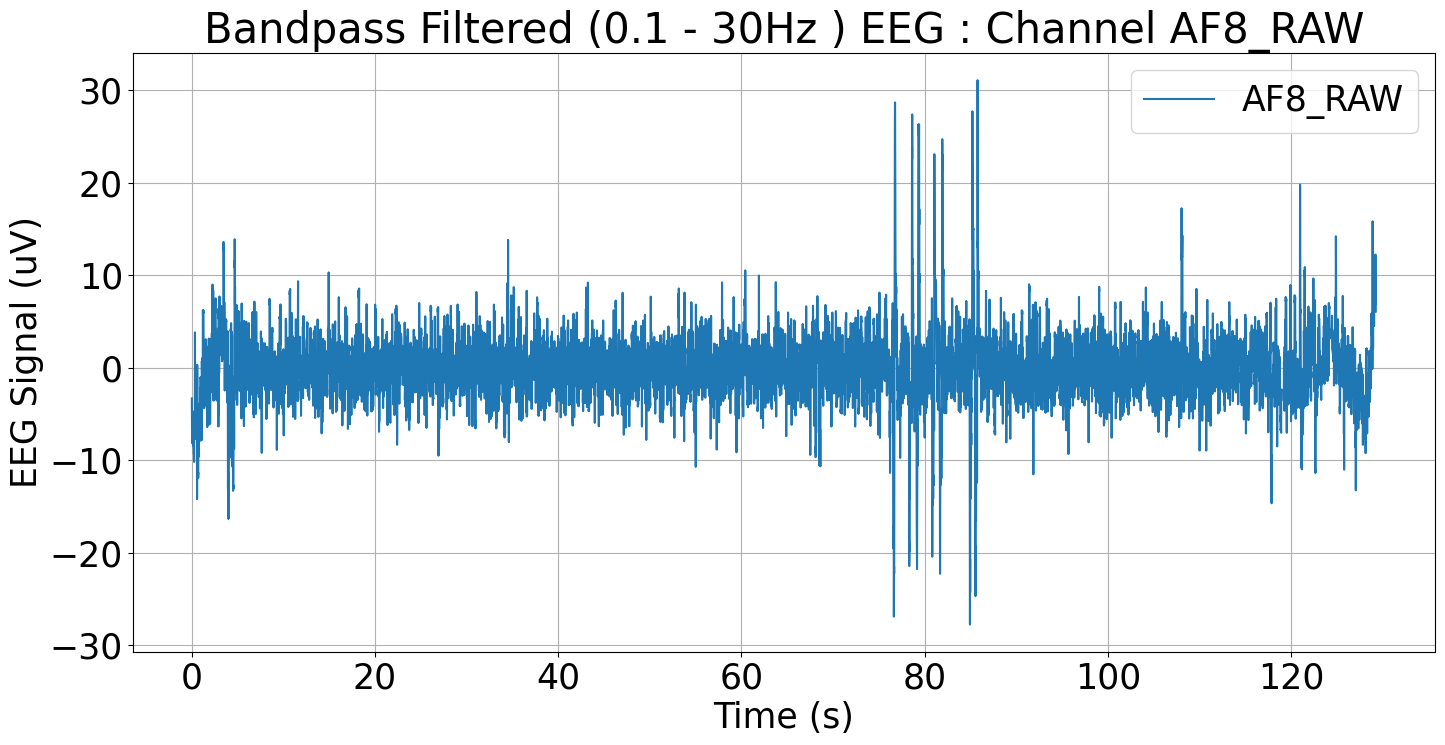

Number of samples: 66615
Channel: TP10_RAW
Number of samples - time_sec: 66615, filtered_data: 66615
filtered_data range: -150.7022356902001 to 104.69296182740914


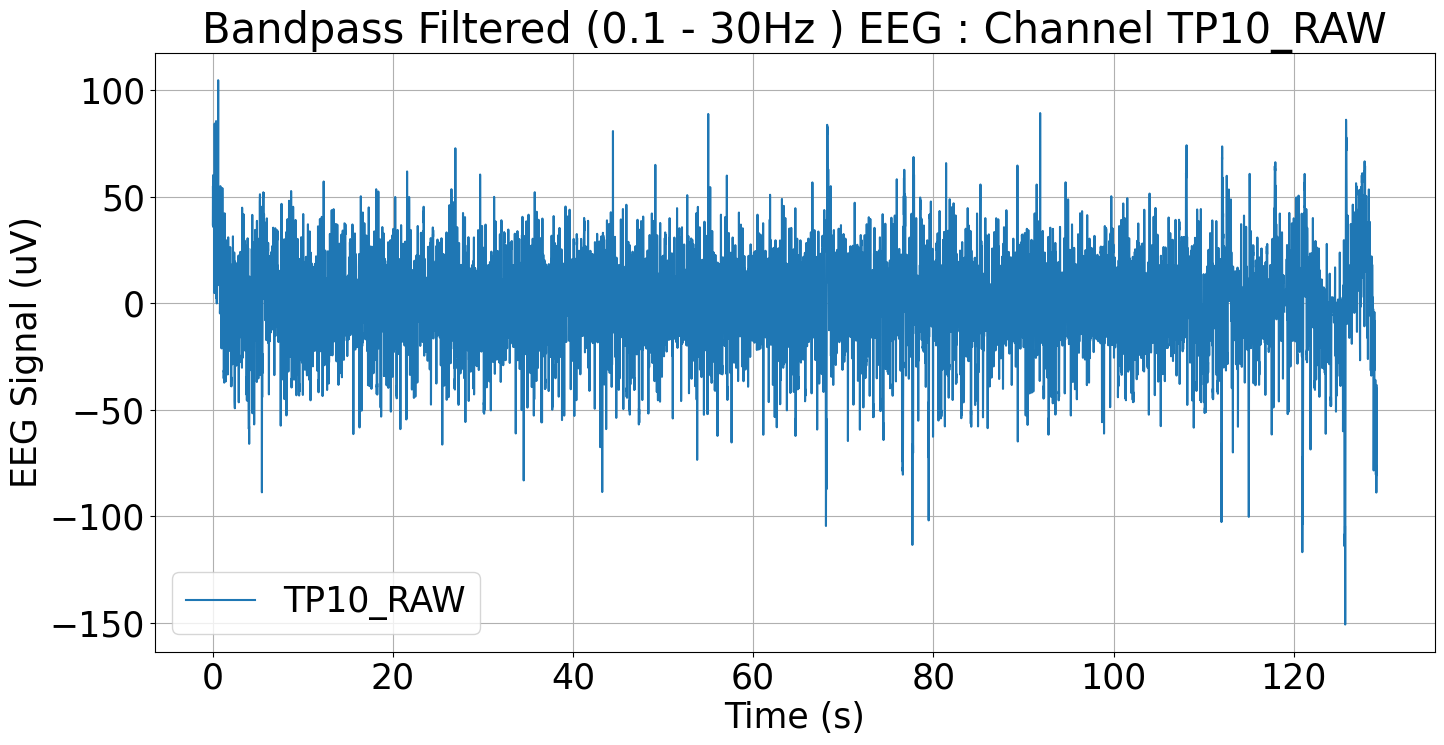

In [380]:
#graphing what we filtered above
for ch in channels:

    print(f"Number of samples: {len(filtered_data[ch])}")

    print(f"Channel: {ch}")
    print(f"Number of samples - time_sec: {len(time_sec)}, filtered_data: {len(filtered_data[ch])}")
    print(f"filtered_data range: {filtered_data[ch].min()} to {filtered_data[ch].max()}")

    plt.figure(figsize=(15, 8))
    plt.plot(time_sec, filtered_data[ch], label=ch)

    plt.xlabel("Time (s)")
    plt.ylabel("EEG Signal (uV)")
    plt.title(f"Bandpass Filtered (0.1 - 30Hz ) EEG : Channel {ch}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

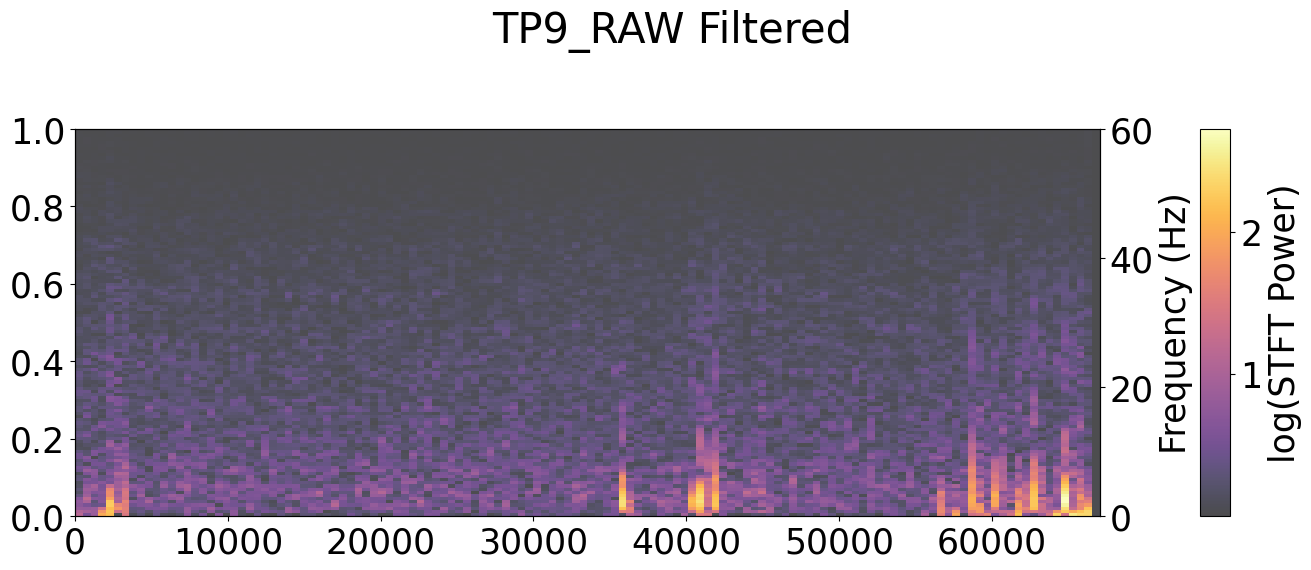

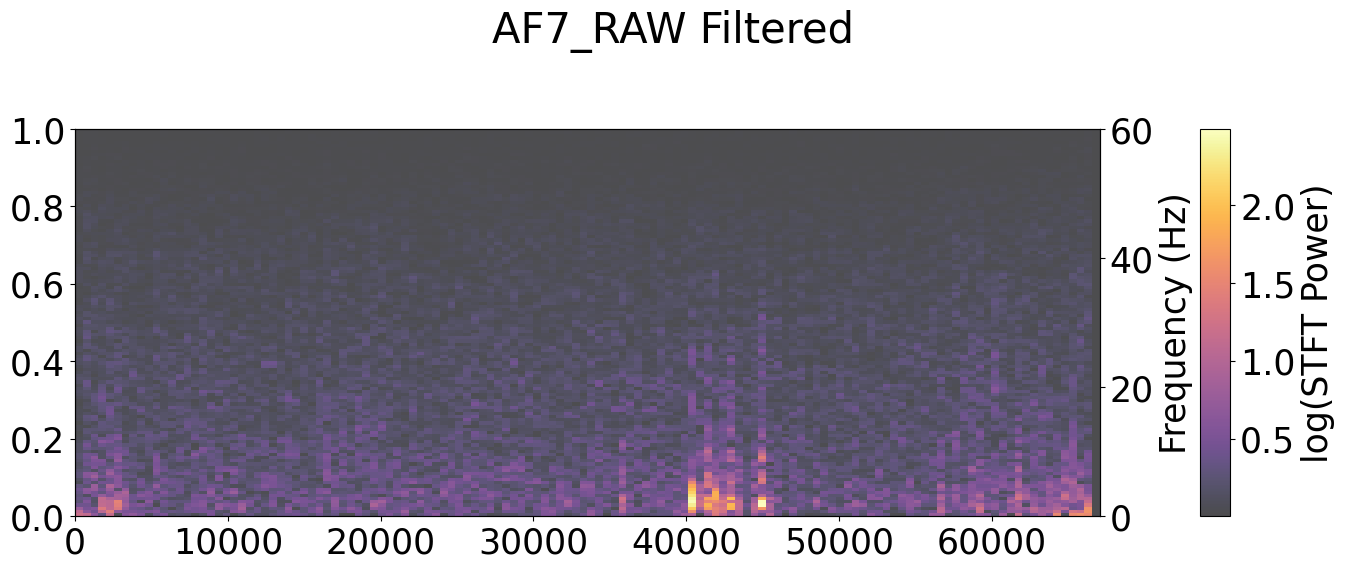

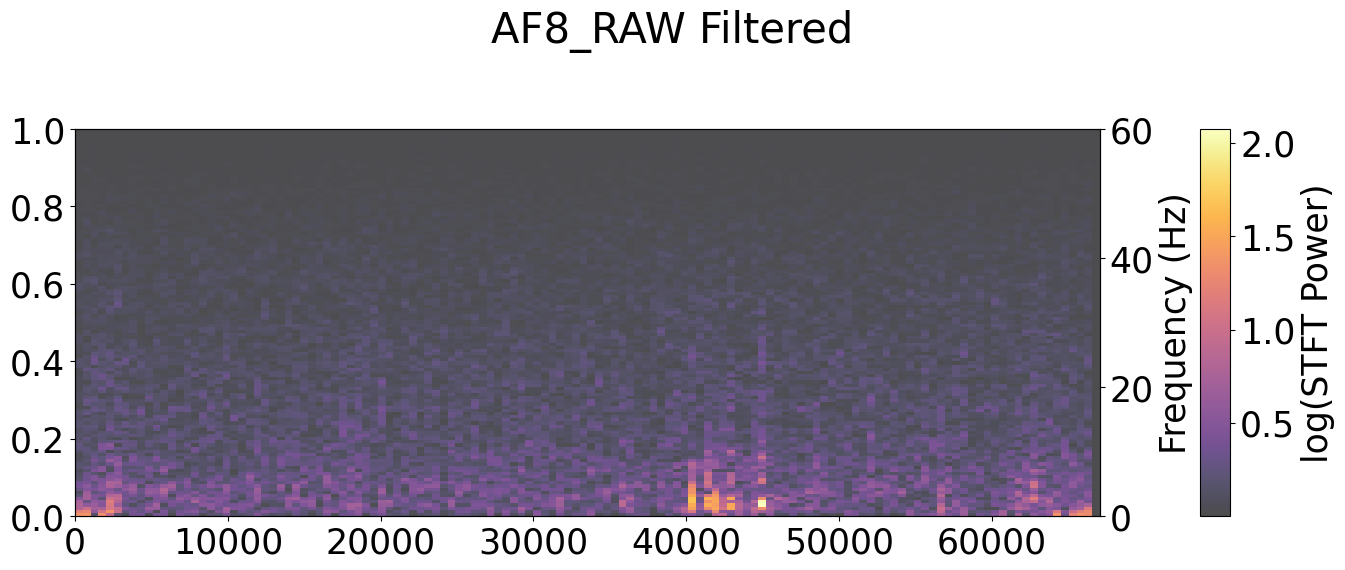

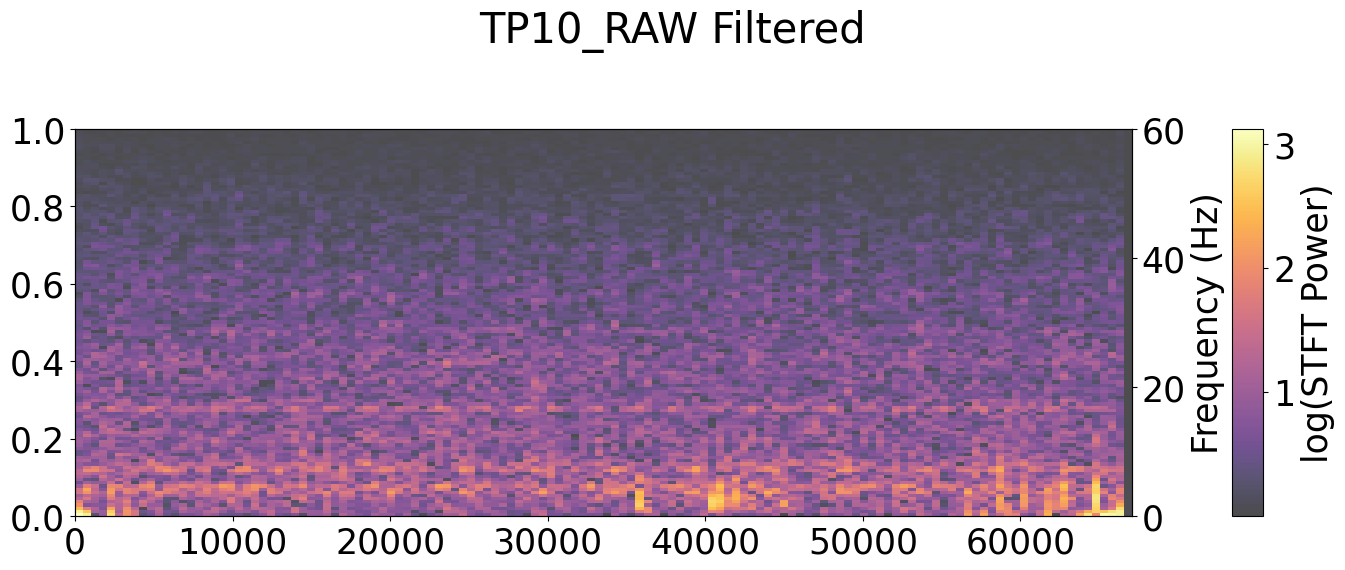

In [381]:
'''
Filtered STFT - Work in Progress!

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html

'''

for ch in channels: 

    # Use a representative channel from the Muse data and apply STFT
    #swapping our df row for filtered data
    channel_idx = filtered_data.columns.get_loc(ch)

    nperseg = 1024 #nperseg 
    freq_max = 60 #Max Freq 

    f, t, Zxx = stft(filtered_data[ch], fs=sfreq, nperseg=nperseg)

    global_t = t * sfreq 

    power = npy.abs(Zxx) #Zxx into absolute values  
    power_log = npy.log1p(power)  # log transform for better contrast

    #plotting the graph 
    fig, ax2 = plt.subplots(figsize=(14, 6))

    ax1 = ax2.twinx()
    extent = [global_t[0], global_t[-1], 0, freq_max]
    im = ax1.imshow(power_log[f <= freq_max, :], extent=extent, aspect='auto',
                    origin='lower', cmap='inferno', alpha=0.7)
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_ylim(0, freq_max)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="3%", pad=1)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label('log(STFT Power)')

    plt.suptitle( (ch + " Filtered") , ha='center')
    fig.tight_layout()
    plt.show()

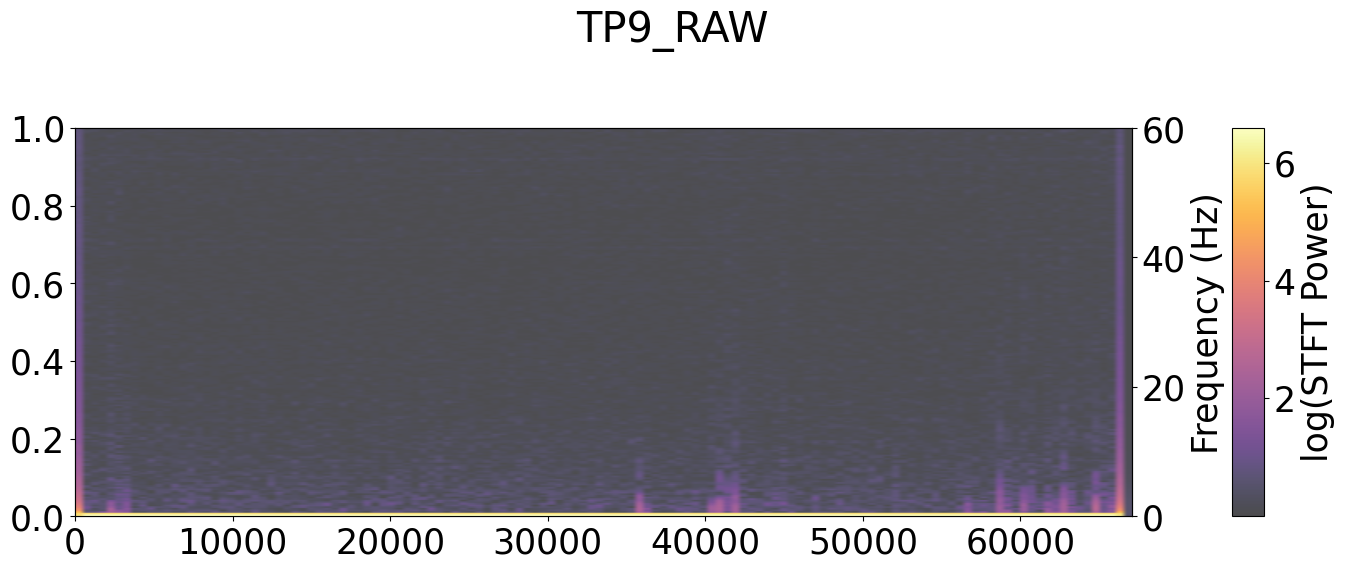

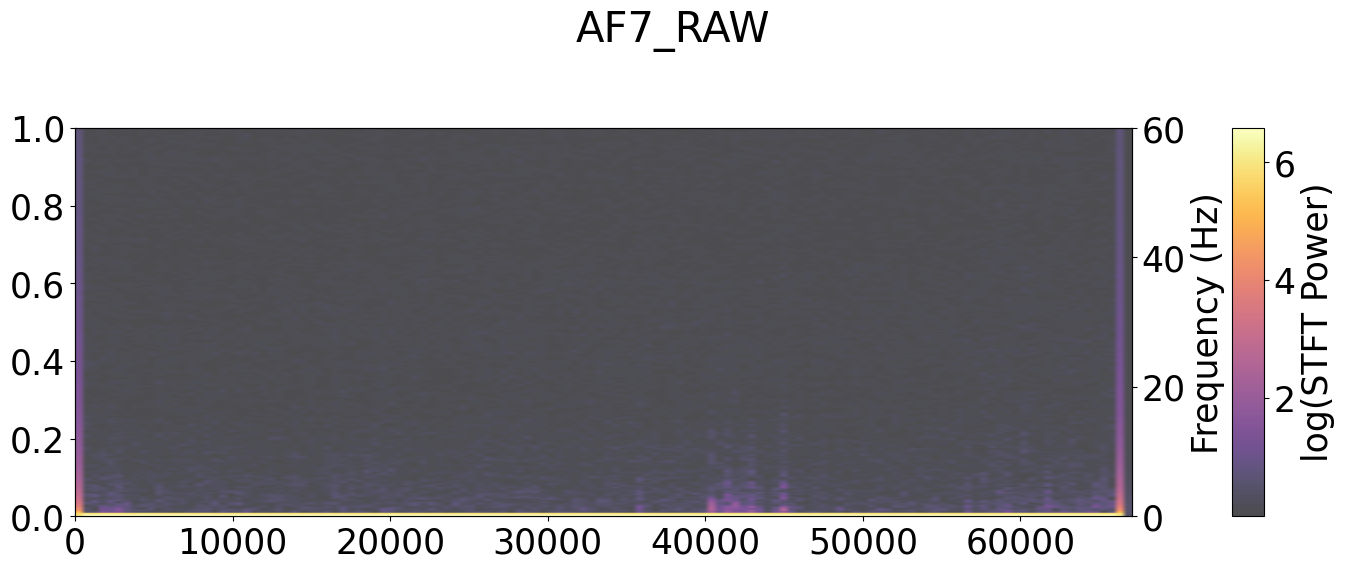

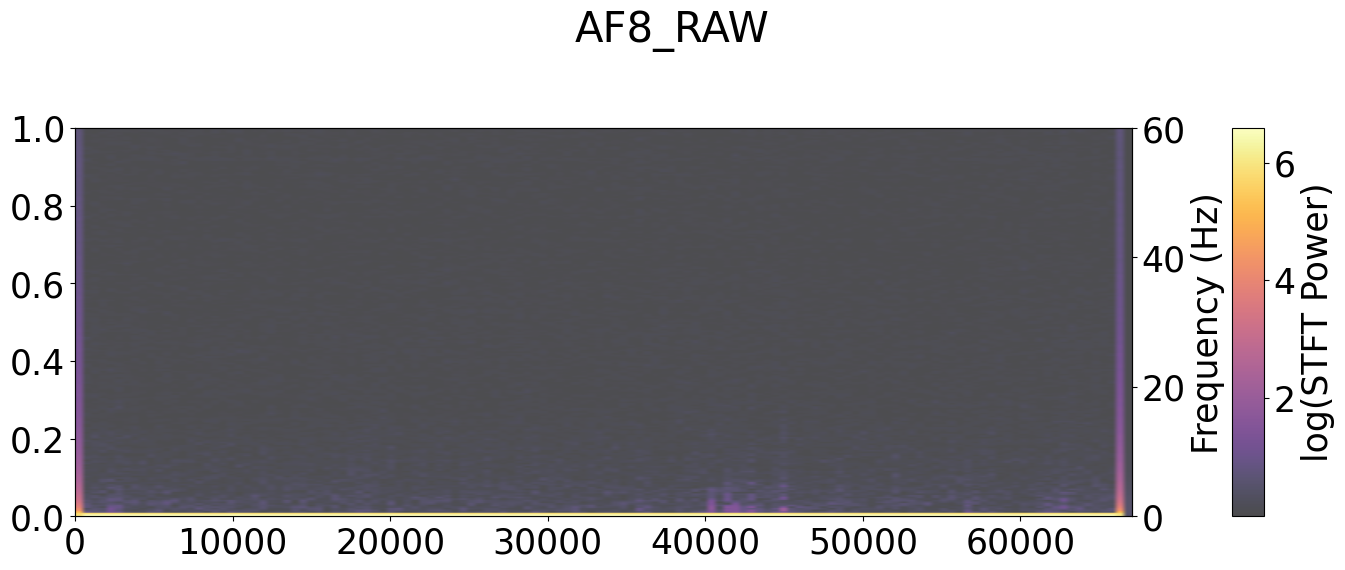

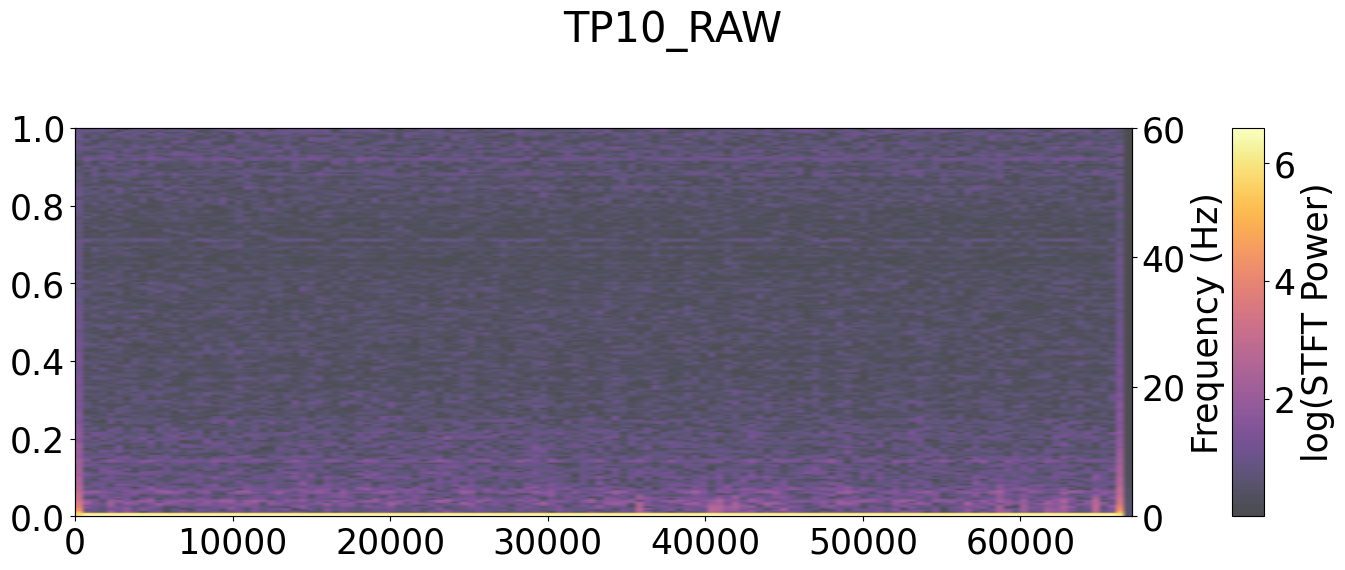

In [382]:
''' 
Unfiltered data STFT
'''

for ch in channels: 

    # Use a representative channel from the Muse data and apply STFT
    fs = 256  # sampling rate
    eeg = df[ch].values
    channel_idx = df.columns.get_loc(ch)

    nperseg = 1024
    freq_max = 60

    f, t, Zxx = stft(eeg, fs=fs, nperseg=nperseg)
    power = npy.abs(Zxx)
    global_t = t * fs  # convert to sample index
    power_log = npy.log1p(power)  # log transform for better contrast

    fig, ax2 = plt.subplots(figsize=(14, 6))

    ax1 = ax2.twinx()
    extent = [global_t[0], global_t[-1], 0, freq_max]
    im = ax1.imshow(power_log[f <= freq_max, :], extent=extent, aspect='auto',
                    origin='lower', cmap='inferno', alpha=0.7)
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_ylim(0, freq_max)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="3%", pad=1)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label('log(STFT Power)')

    plt.suptitle(ch, ha='center')
    fig.tight_layout()
    plt.show()


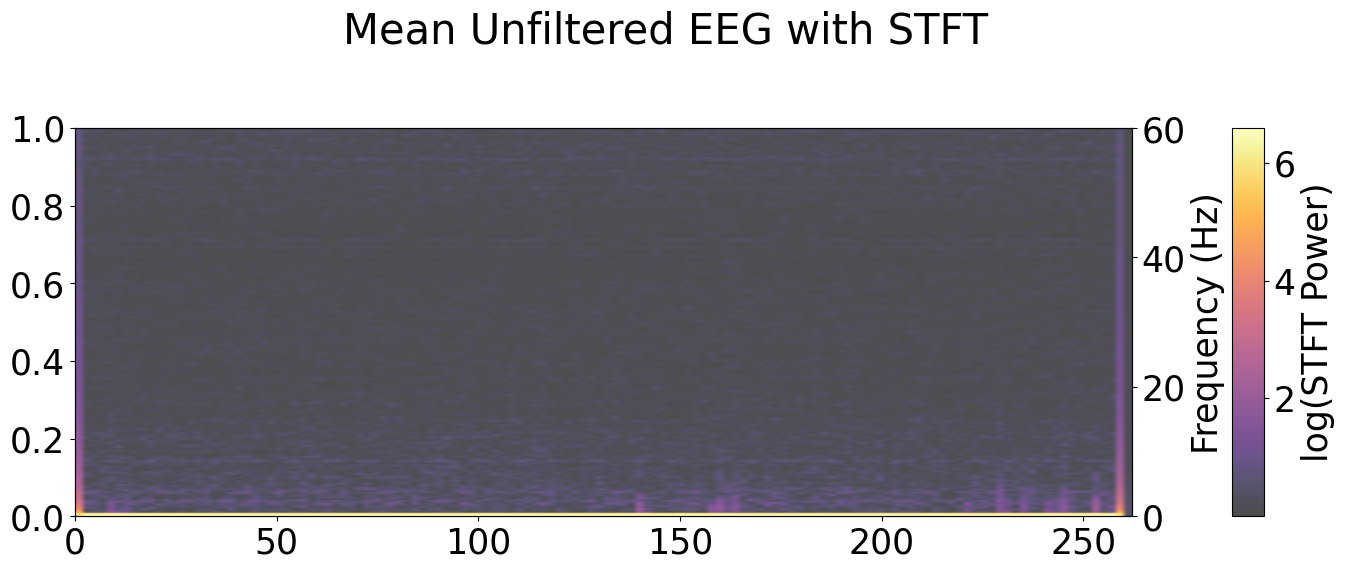

In [383]:
''' 
Unfiltered avg STFT (Work in Progress!)
'''
fs = 256  #Muse uses 256Hz
channels = ["TP9_RAW", "AF7_RAW", "AF8_RAW", "TP10_RAW"]
eeg_mean = df[channels].mean(axis=1).values
time_sec = df["ms_ELAPSED"] / 1000.0

nperseg = 1024
freq_max = 60  #Relevant bands

f, t, Zxx = stft(eeg_mean, fs=fs, nperseg=nperseg, boundary='zeros')
power = npy.abs(Zxx)
power_log = npy.log1p(power)  # log transform for visibility
time_stft_sec = t  # t is already in seconds

fig, ax2 = plt.subplots(figsize=(14, 6))

ax1 = ax2.twinx()
extent = [time_stft_sec[0], time_stft_sec[-1], 0, freq_max]
im = ax1.imshow(power_log[f <= freq_max, :], extent=extent, aspect='auto',
                origin='lower', cmap='inferno', alpha=0.7)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_ylim(0, freq_max)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=1)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('log(STFT Power)')

plt.suptitle("Mean Unfiltered EEG with STFT ")
fig.tight_layout()
plt.show()


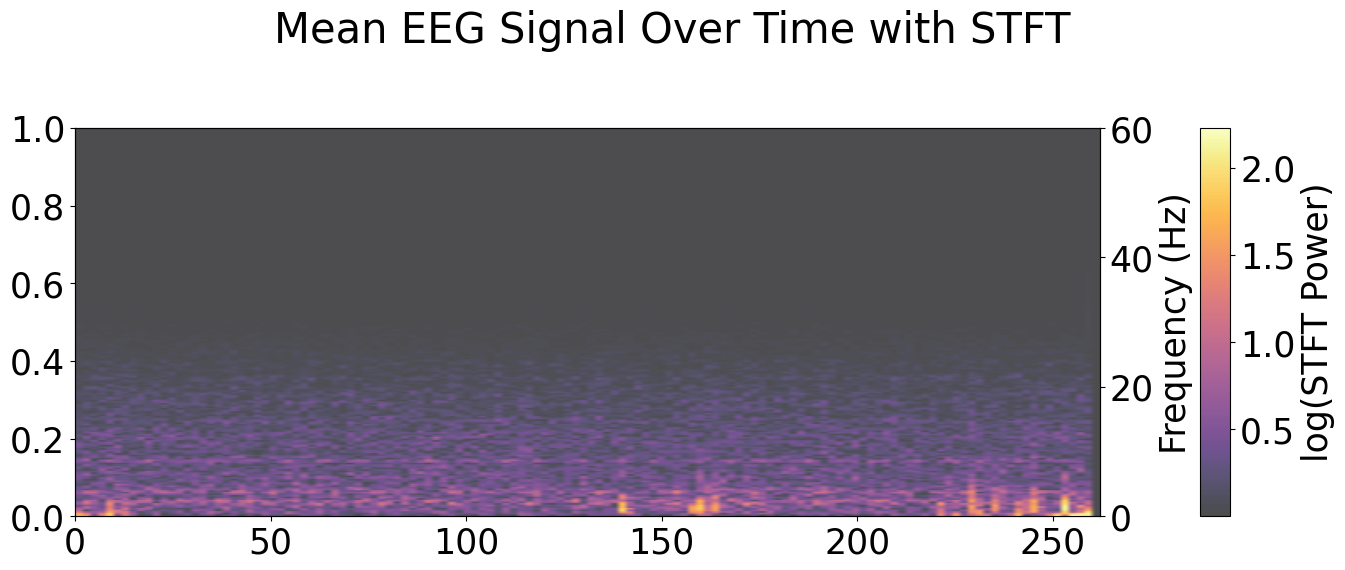

In [384]:
''' 
Filtered avg STFT
'''
fs = 256  #Muse uses 256Hz
eeg_mean = filtered_data[channels].mean(axis=1).values
time_sec = df["ms_ELAPSED"] / 1000.0

nperseg = 1024
freq_max = 60  #Relevant bands

f, t, Zxx = stft(eeg_mean, fs=fs, nperseg=nperseg, boundary='zeros')
power = npy.abs(Zxx)
power_log = npy.log1p(power)  # log transform for visibility
time_stft_sec = t  # t is already in seconds

fig, ax2 = plt.subplots(figsize=(14, 6))

ax1 = ax2.twinx()
extent = [time_stft_sec[0], time_stft_sec[-1], 0, freq_max]
im = ax1.imshow(power_log[f <= freq_max, :], extent=extent, aspect='auto',
                origin='lower', cmap='inferno', alpha=0.7)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_ylim(0, freq_max)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=1)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('log(STFT Power)')

plt.suptitle("Mean EEG Signal Over Time with STFT")
fig.tight_layout()
plt.show()


/tmp/ipykernel_21339/123891870.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


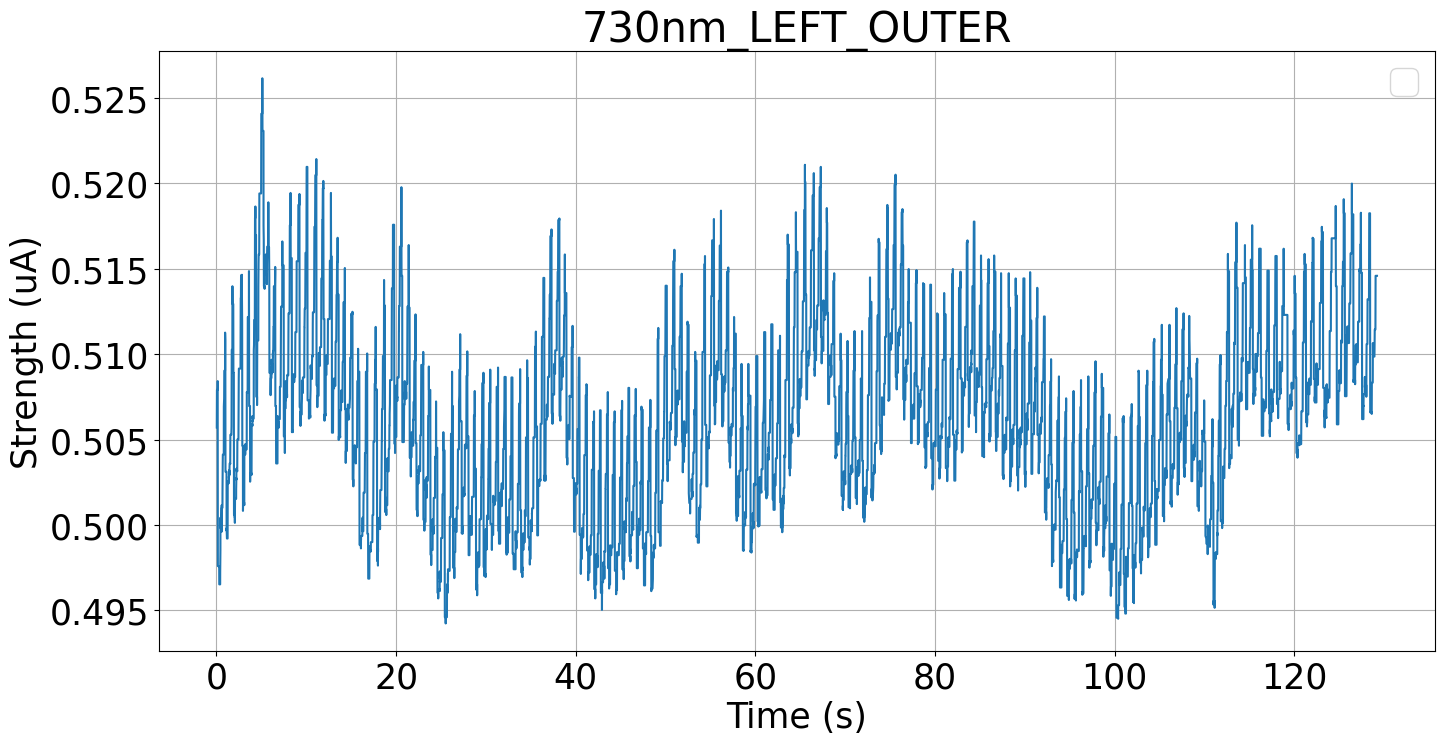

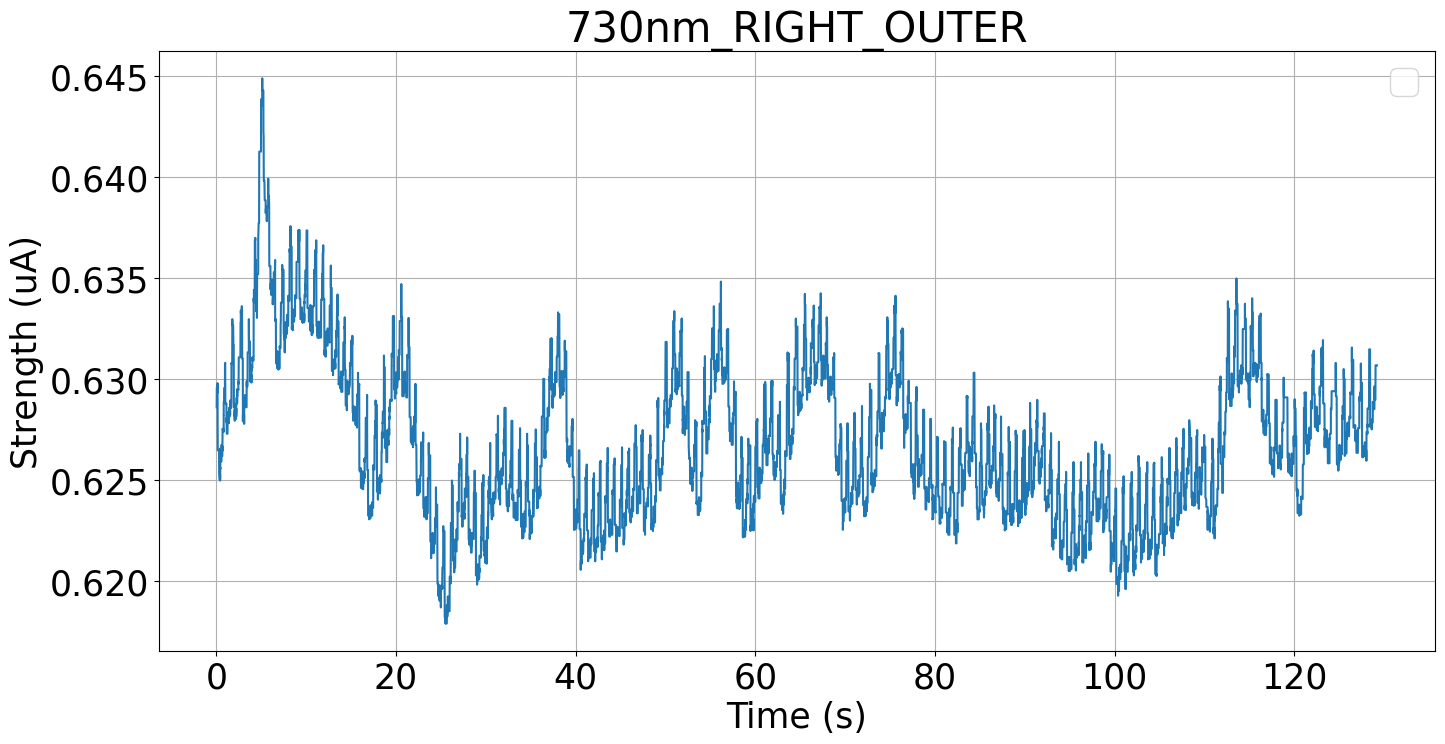

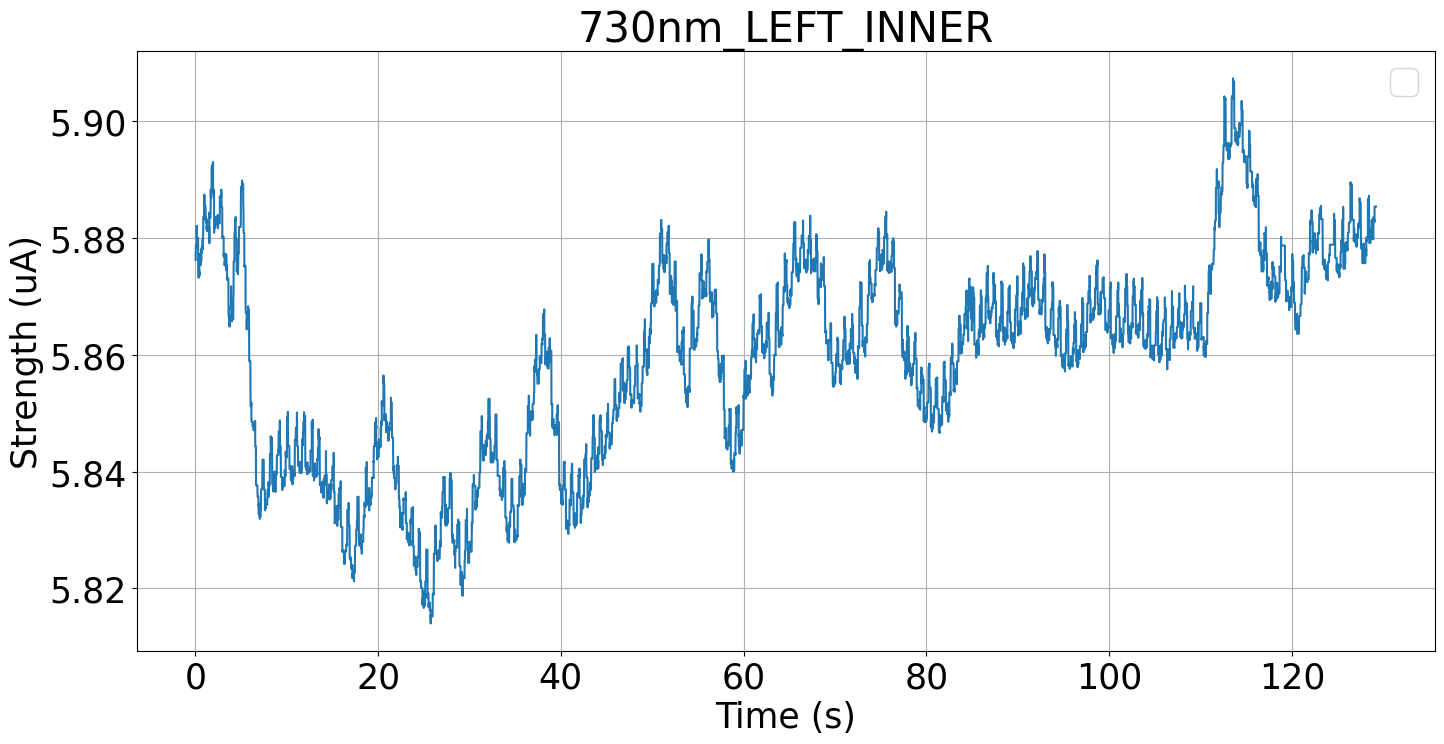

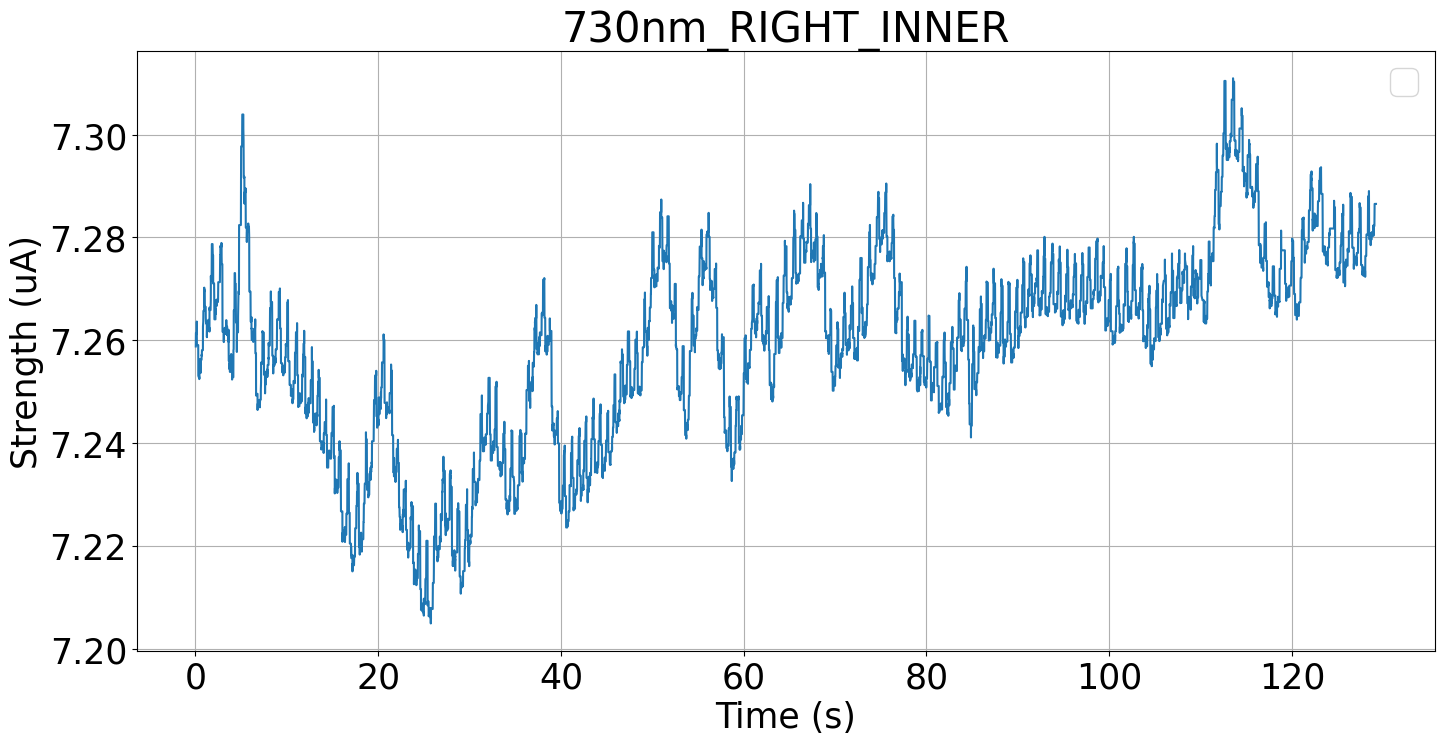

In [385]:
''' 
Graphing raw Athena fNIRS 
'''

channels = ["730nm_LEFT_OUTER" , "730nm_RIGHT_OUTER" , "730nm_LEFT_INNER","730nm_RIGHT_INNER"]

for ch in channels:

    plt.figure(figsize=(15, 8))
    plt.plot(time_sec, df[ch])
    plt.title(ch)
    plt.xlabel("Time (s)")
    plt.ylabel("Strength (uA)")
    #plt.xlim(0,30)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()